In [1]:
import itertools as it
import os

from iterpop import iterpop as ip
import matplotlib as mpl
from matplotlib import pyplot as plt
from nbmetalog import nbmetalog as nbm
import numpy as np
import pandas as pd
from scipy import stats as scipy_stats
import seaborn as sns
from teeplot import teeplot as tp


In [2]:
# prints metadata about notebook runtime
nbm.print_metadata()


context: ci
hostname: fv-az1019-297
interpreter: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
nbcellexec: null
nbname: spatial-nuissance-phylometrics
nbpath: /home/runner/work/hstrat-evolutionary-inference/hstrat-evolutionary-inference/binder/spatial-nuissance-phylometrics.ipynb
revision: null
session: f9b08aca-eec9-4613-945e-9b2bf2d3dc67
timestamp: 2024-03-23T03:11:56Z00:00


IPython==8.13.0
keyname==0.5.2
yaml==6.0
iterpop==0.4.1
matplotlib==3.7.1
nbmetalog==0.2.6
numpy==1.21.6
pandas==1.3.5
scipy==1.7.3
seaborn==0.12.1
teeplot==0.5.0
re==2.2.1
comm==0.2.2
logging==0.5.1.2
psutil==5.9.8
zmq==24.0.1
json==2.0.9
ipykernel==6.29.3


In [3]:
df = pd.read_csv("https://osf.io/2xuyg/download")
dfdigest = np.bitwise_xor.reduce(
    pd.util.hash_pandas_object(df),
)
print("{:x}".format(dfdigest))
df


a78d74bbfd66538a


a  epoch                  mut_distn  \
0       consolidated-phylogeny      2      np.random.exponential   
1       consolidated-phylogeny      2      np.random.exponential   
2       consolidated-phylogeny      2      np.random.exponential   
3       consolidated-phylogeny      2      np.random.exponential   
4       consolidated-phylogeny      2      np.random.exponential   
...                        ...    ...                        ...   
109195      reconstructed-tree      2  np.random.standard_normal   
109196      reconstructed-tree      2  np.random.standard_normal   
109197      reconstructed-tree      2  np.random.standard_normal   
109198      reconstructed-tree      2  np.random.standard_normal   
109199      reconstructed-tree      2  np.random.standard_normal   

        num_generations  num_islands  num_niches  p_island_migration  \
0                 32768         1024           4                0.01   
1                 32768         1024           4                0.01   
2                 32768         1024           4                0.01   
3                 32768         1024           4                0.01   
4                 32768         1024           4                0.01   
...                 ...          ...         ...                 ...   
109195            32768            1           4                0.01   
109196            32768            1           4                0.01   
109197            32768            1           4                0.01   
109198            32768            1           4                0.01   
109199            32768            1           4                0.01   

        p_niche_invasion  population_size  replicate  ...  \
0           3.051758e-08            32768         36  ...   
1           3.051758e-08            32768         37  ...   
2           3.051758e-08            32768          6  ...   
3           3.051758e-08            32768         20  ...   
4           3.051758e-08            32768         34  ...   
...                  ...              ...        ...  ...   
109195      3.051758e-08            32768         10  ...   
109196      3.051758e-08            32768         16  ...   
109197      3.051758e-08            32768          1  ...   
109198      3.051758e-08            32768         10  ...   
109199      3.051758e-08            32768         36  ...   

        variance_pairwise_distance  variance_pairwise_distance_branch_only  \
0                    287183.364388                               14.043593   
1                    348528.257947                               14.320022   
2                    229751.399043                               13.258748   
3                    228292.620676                               10.335814   
4                    245030.093866                               12.832336   
...                            ...                                     ...   
109195                   24.562416                               24.562416   
109196                   17.300466                               17.300466   
109197                   88.702783                               88.702783   
109198                   25.685331                               25.685331   
109199                   23.312447                               23.312447   

        mrca_depth  sackin_index mean_evolutionary_distinctiveness  \
0                0         27223                       1210.960392   
1                0         31933                       1056.875368   
2                0         28964                       1151.469136   
3                0         23933                       1289.021227   
4                0         26307                       1217.977803   
...            ...           ...                               ...   
109195           1          3305                         99.163609   
109196           0          2923                       1893.146789   
109197           1        717008               

In [4]:
# phylometrics whittled down to descriptive, non-redundant set
df["colless-like index"] = df["colless_like_index"]
df["mean pairwise distance"] = df["mean_pairwise_distance"]
df["sum distance"] = df["sum_distance"]
df["mean evolutionary distinctiveness"] = df[
    "mean_evolutionary_distinctiveness"
]

phylometrics = [
    #     'diversity',
    "colless-like index",
    #     'average_depth',
    #     'average_origin_time',
    #     'average_origin_time_normalized',
    #     'max_depth',
    "mean pairwise distance",
    #     'mean_pairwise_distance_branch_only',
    #     'num_active',
    "sum distance",
    # "num_ancestors",
    #     'num_outside',
    #     'num_roots',
    #     'num_taxa',
    #     'phylogenetic_diversity',
    #     'sum_pairwise_distance',
    #     'sum_pairwise_distance_branch_only',
    #     'total_orgs',
    #     'tree_size',
    #     'variance_pairwise_distance',
    #     'variance_pairwise_distance_branch_only',
    #     'mrca_depth',
    #     'sackin_index',
    "mean evolutionary distinctiveness",
    #     'sum_evolutionary_distinctiveness',
    #     'variance_evolutionary_distinctiveness',
]


In [5]:
methodological_variables = [
    "resolution",
]


In [6]:
evolutionary_variables = [
    "num_niches",
]


In [7]:
sensitivity_analysis_variables = [
    "epoch",
    "mut_distn",
]


In [8]:
fixed_variables = [
    "num_generations",  # homogeneous (num generations per epoch)
    "p_island_migration",  # homogeneous
    "population_size",  # homogeneous
    "subsampling-fraction",  # only use 1.0
    "trie-postprocess",  # just use naive postprocessing for now
    "tournament_size",  # only use 2
    "num_islands",  # only use 1024
]


In [9]:
# ensure fixed variables
df = df[
    (df["p_island_migration"] == 0.01)
    & (df["tournament_size"] == 2)
    & (df["num_islands"] == 1024)
    & ((df["subsampling-fraction"] == 1.0) | df["subsampling-fraction"].isna())
    & ((df["trie-postprocess"] == "naive") | df["trie-postprocess"].isna())
].copy()

for fixed_variable in fixed_variables:
    assert len(df[fixed_variable].dropna().unique()) == 1, excluded_variable

df


a  epoch              mut_distn  num_generations  \
0       consolidated-phylogeny      2  np.random.exponential            32768   
1       consolidated-phylogeny      2  np.random.exponential            32768   
2       consolidated-phylogeny      2  np.random.exponential            32768   
3       consolidated-phylogeny      2  np.random.exponential            32768   
4       consolidated-phylogeny      2  np.random.exponential            32768   
...                        ...    ...                    ...              ...   
105361      reconstructed-tree      7  np.random.exponential            32768   
105377      reconstructed-tree      7  np.random.exponential            32768   
105378      reconstructed-tree      7  np.random.exponential            32768   
105382      reconstructed-tree      7  np.random.exponential            32768   
105391      reconstructed-tree      7  np.random.exponential            32768   

        num_islands  num_niches  p_island_migration  p_niche_invasion  \
0              1024           4                0.01      3.051758e-08   
1              1024           4                0.01      3.051758e-08   
2              1024           4                0.01      3.051758e-08   
3              1024           4                0.01      3.051758e-08   
4              1024           4                0.01      3.051758e-08   
...             ...         ...                 ...               ...   
105361         1024           8                0.01      3.051758e-08   
105377         1024           8                0.01      3.051758e-08   
105378         1024           8                0.01      3.051758e-08   
105382         1024           8                0.01      3.051758e-08   
105391         1024           8                0.01      3.051758e-08   

        population_size  replicate  ...  mean_evolutionary_distinctiveness  \
0                 32768         36  ...                        1210.960392   
1                 32768         37  ...                        1056.875368   
2                 32768          6  ...                        1151.469136   
3                 32768         20  ...                        1289.021227   
4                 32768         34  ...                        1217.977803   
...                 ...        ...  ...                                ...   
105361            32768         38  ...                         313.221619   
105377            32768         14  ...                         336.758774   
105378            32768         39  ...                         309.332581   
105382            32768         38  ...                         305.019302   
105391            32768         10  ...                         330.335556   

        sum_evolutionary_distinctiveness  \
0                              3210256.0   
1                              3230868.0   
2                              3171146.0   
3                              3339854.0   
4                              3237385.0   
...                                  ...   
105361                        10263646.0   
105377                        11034911.5   
105378                        10136210.0   
105382                         9994872.5   
105391                        10824435.5   

        variance_evolutionary_distinctiveness  resolution  \
0                               504052.827821         NaN   
1                               865335.516754         NaN   
2                               727694.363524         NaN   
3                               436404.480172         NaN   
4                               540209.820753         NaN   
...                                       ...         ...   
105361                           16111.276187         3.0   
105377                           27108.474690        30.0   
105378                           22480.165720       100.0   
105382                           14447.708552        10.0   
105391                           30953.987

In [10]:
# exclude extraneous variable values
df = df[(df["a"] != "consolidated-phylogeny")].copy()

df


a  epoch                  mut_distn  \
50      collapsed-phylogeny      7  np.random.standard_normal   
51      collapsed-phylogeny      7  np.random.standard_normal   
52      collapsed-phylogeny      7  np.random.standard_normal   
53      collapsed-phylogeny      7  np.random.standard_normal   
54      collapsed-phylogeny      7  np.random.standard_normal   
...                     ...    ...                        ...   
105361   reconstructed-tree      7      np.random.exponential   
105377   reconstructed-tree      7      np.random.exponential   
105378   reconstructed-tree      7      np.random.exponential   
105382   reconstructed-tree      7      np.random.exponential   
105391   reconstructed-tree      7      np.random.exponential   

        num_generations  num_islands  num_niches  p_island_migration  \
50                32768         1024           4                0.01   
51                32768         1024           4                0.01   
52                32768         1024           4                0.01   
53                32768         1024           4                0.01   
54                32768         1024           4                0.01   
...                 ...          ...         ...                 ...   
105361            32768         1024           8                0.01   
105377            32768         1024           8                0.01   
105378            32768         1024           8                0.01   
105382            32768         1024           8                0.01   
105391            32768         1024           8                0.01   

        p_niche_invasion  population_size  replicate  ...  \
50          3.051758e-06            32768         20  ...   
51          3.051758e-06            32768          4  ...   
52          3.051758e-06            32768         41  ...   
53          3.051758e-06            32768         47  ...   
54          3.051758e-06            32768         15  ...   
...                  ...              ...        ...  ...   
105361      3.051758e-08            32768         38  ...   
105377      3.051758e-08            32768         14  ...   
105378      3.051758e-08            32768         39  ...   
105382      3.051758e-08            32768         38  ...   
105391      3.051758e-08            32768         10  ...   

        mean_evolutionary_distinctiveness  sum_evolutionary_distinctiveness  \
50                              78.882446                         2584820.0   
51                              81.707306                         2677385.0   
52                              83.217377                         2726867.0   
53                              86.538544                         2835695.0   
54                              76.277557                         2499463.0   
...                                   ...                               ...   
105361                         313.221619                        10263646.0   
105377                         336.758774                        11034911.5   
105378                         309.332581                        10136210.0   
105382                         305.019302                         9994872.5   
105391                         330.335556                        10824435.5   

        variance_evolutionary_distinctiveness  resolution  \
50                                1348.379396         NaN   
51                                1030.406615         NaN   
52                                1170.361609         NaN   
53                                1284.142442         NaN   
54                                1545.456043         NaN   
...                                       ...         ...   
105361                           16111.276187         3.0   
105377                           27108.474690        30.0   
105378                           22480.165720       100.0   
105382                           14447.708552        10.0   
105391                     

In [11]:
df["num_niches"].unique()


array([4, 1, 8])

In [12]:
df["num_islands"].unique()


array([1024])

In [13]:
df["tournament_size"].unique()


array([2])

In [14]:
df["a"].unique()


array(['collapsed-phylogeny', 'reconstructed-tree'], dtype=object)

In [15]:
df["regime"] = df.apply(
    lambda row: {
        (1024, 1, 3.0517578125e-08): "plain",
        (1024, 4, 3.0517578125e-08): "4 niche ecology",
        (1024, 4, 3.0517578125e-06): "weak 4 niche ecology",
        (1024, 8, 3.0517578125e-08): "8 niche ecology",
    }.get(
        tuple(row[["num_islands", "num_niches", "p_niche_invasion"]]),
        np.nan,  # default
    ),
    axis="columns",
)
df["regime"].unique()


array(['weak 4 niche ecology', '4 niche ecology', 'plain',
       '8 niche ecology'], dtype=object)

In [16]:
df[df["a"] == "collapsed-phylogeny"]["regime"].unique()


array(['weak 4 niche ecology', '4 niche ecology', 'plain',
       '8 niche ecology'], dtype=object)

# perfect phylogenetic data


In [17]:
melted_df = df[(df["a"] == "collapsed-phylogeny")].melt(
    id_vars=evolutionary_variables
    + methodological_variables
    + sensitivity_analysis_variables
    + ["regime"],
    value_vars=phylometrics,
)
melted_df["phylometric"] = melted_df["variable"]
melted_df


num_niches  resolution  epoch                  mut_distn  \
0              4         NaN      7  np.random.standard_normal   
1              4         NaN      7  np.random.standard_normal   
2              4         NaN      7  np.random.standard_normal   
3              4         NaN      7  np.random.standard_normal   
4              4         NaN      7  np.random.standard_normal   
...          ...         ...    ...                        ...   
4795           4         NaN      2      np.random.exponential   
4796           4         NaN      2      np.random.exponential   
4797           4         NaN      2      np.random.exponential   
4798           4         NaN      2      np.random.exponential   
4799           4         NaN      2      np.random.exponential   

                    regime                           variable          value  \
0     weak 4 niche ecology                 colless-like index  269758.311432   
1     weak 4 niche ecology                 colless-like index  245694.126217   
2     weak 4 niche ecology                 colless-like index  229733.780163   
3     weak 4 niche ecology                 colless-like index  233461.802088   
4     weak 4 niche ecology                 colless-like index  262782.396217   
...                    ...                                ...            ...   
4795  weak 4 niche ecology  mean evolutionary distinctiveness      62.567078   
4796  weak 4 niche ecology  mean evolutionary distinctiveness      54.291748   
4797  weak 4 niche ecology  mean evolutionary distinctiveness      61.928589   
4798  weak 4 niche ecology  mean evolutionary distinctiveness      65.404114   
4799  weak 4 niche ecology  mean evolutionary distinctiveness      61.885101   

                            phylometric  
0                    colless-like index  
1                    colless-like index  
2                    colless-like index  
3                    colless-like index  
4                    colless-like index  
...                                 ...  
4795  mean evolutionary distinctiveness  
4796  mean evolutionary distinctiveness  
4797  mean evolutionary distinctiveness  
4798  mean evolutionary distinctiveness  
4799  mean evolutionary distinctiveness  

[4800 rows x 8 columns]

teeplots/./col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.pdf


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.png


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.pdf


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.png


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.pdf


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.png


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.pdf


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.png


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.pdf


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.png


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.pdf


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.png


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.pdf


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.png


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.pdf


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.png


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.pdf


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.png


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.pdf


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.png


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.pdf


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.png


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.pdf


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=boxplot+x=value+y=regime+ext=.png


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.pdf


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.png


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.pdf


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.png


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.pdf


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.png


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.pdf


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.png


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.pdf


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.png


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.pdf


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=violinplot+x=value+y=regime+ext=.png


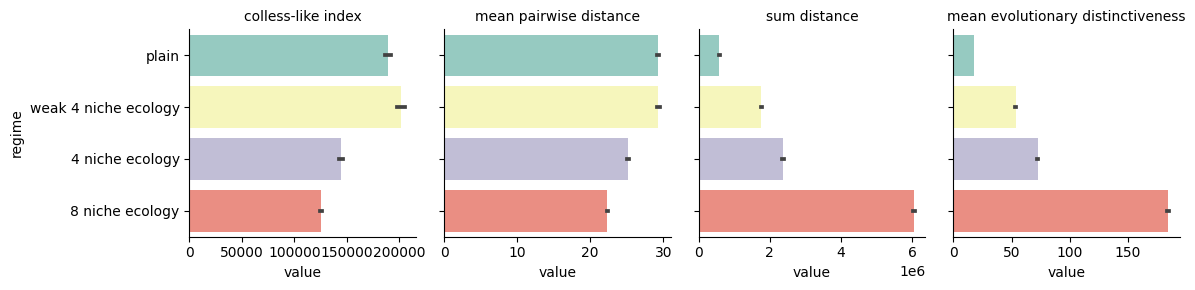

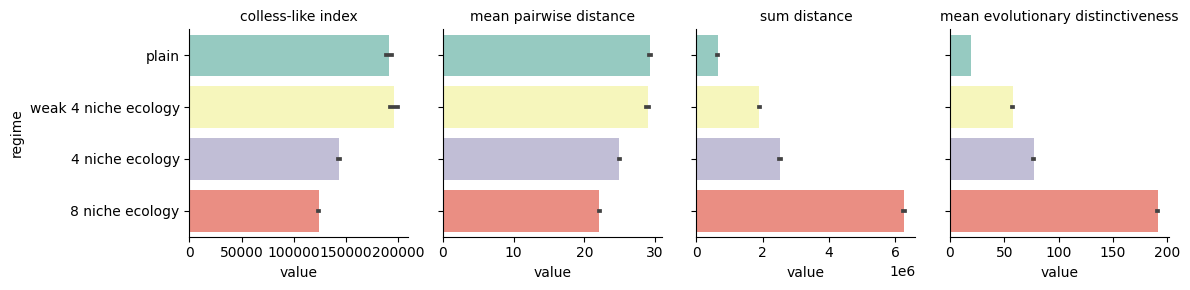

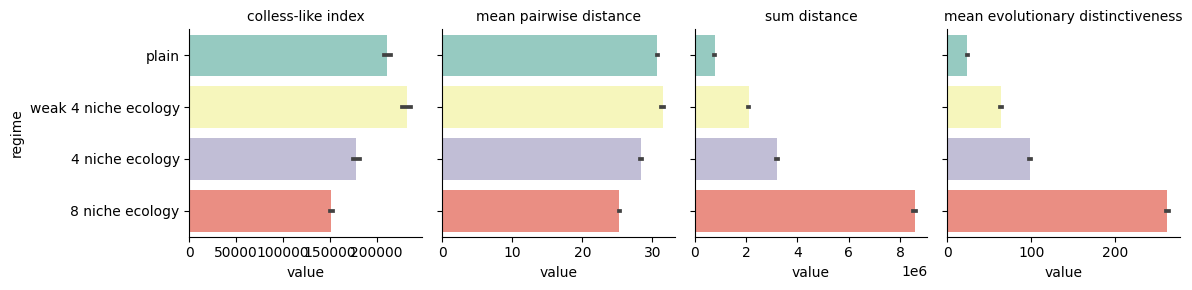

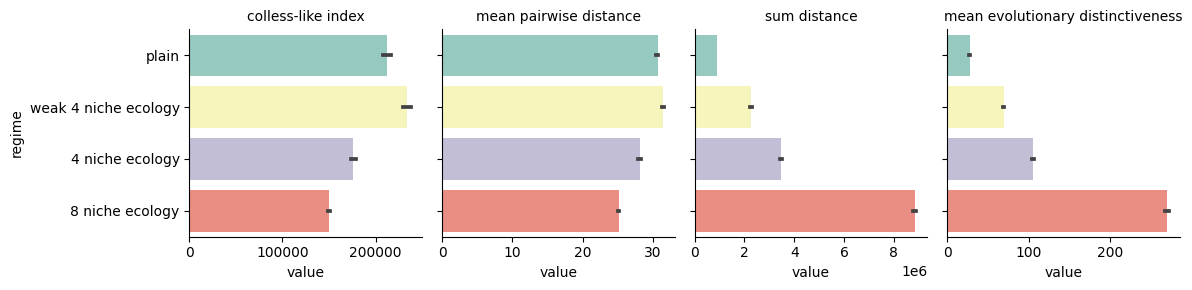

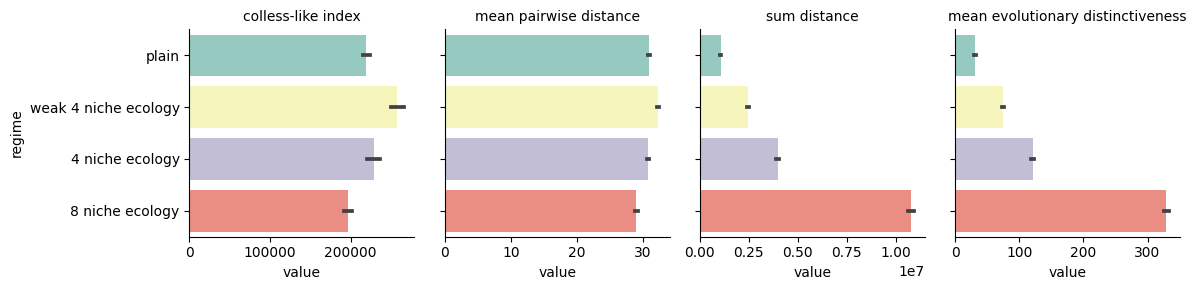

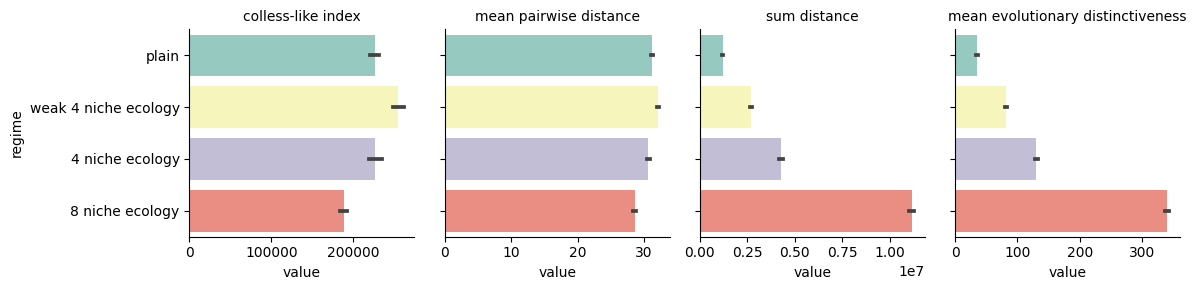

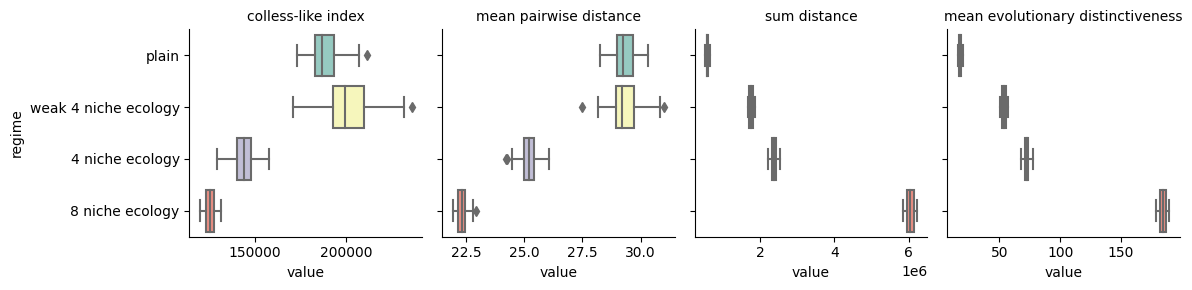

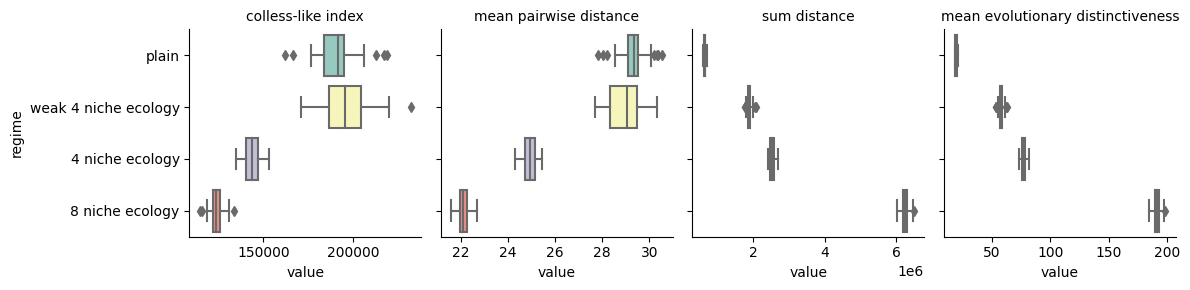

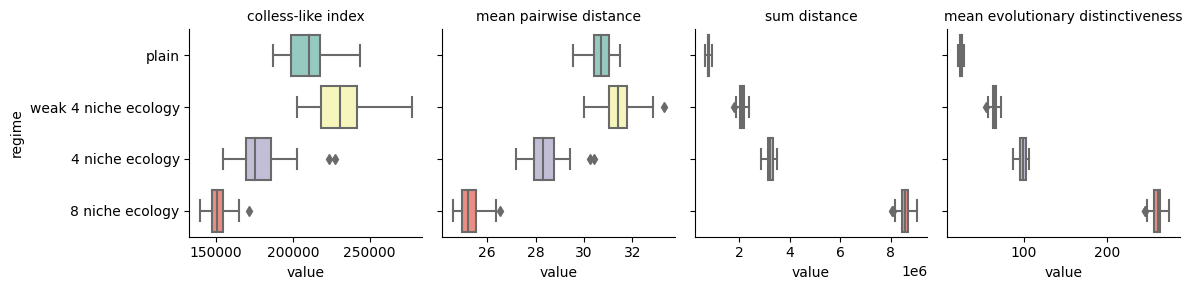

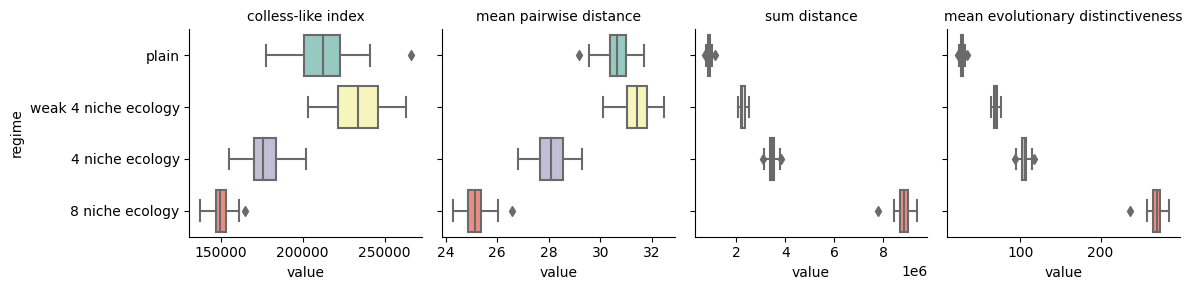

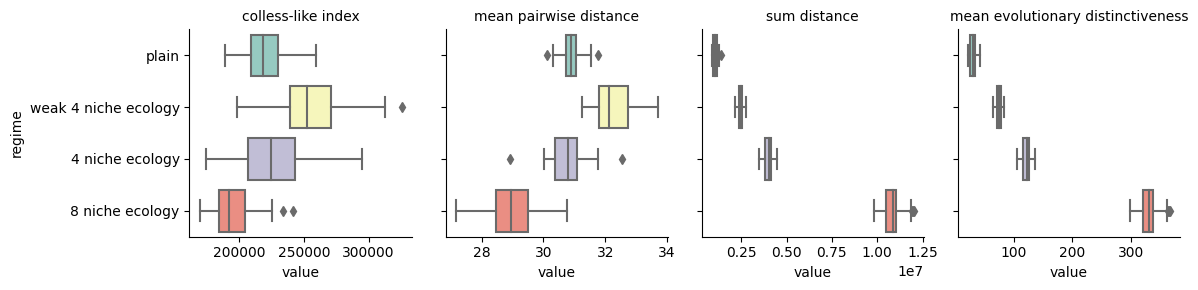

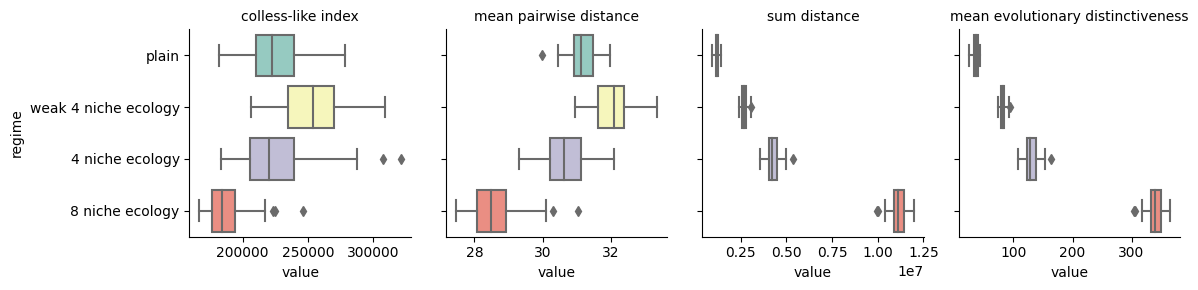

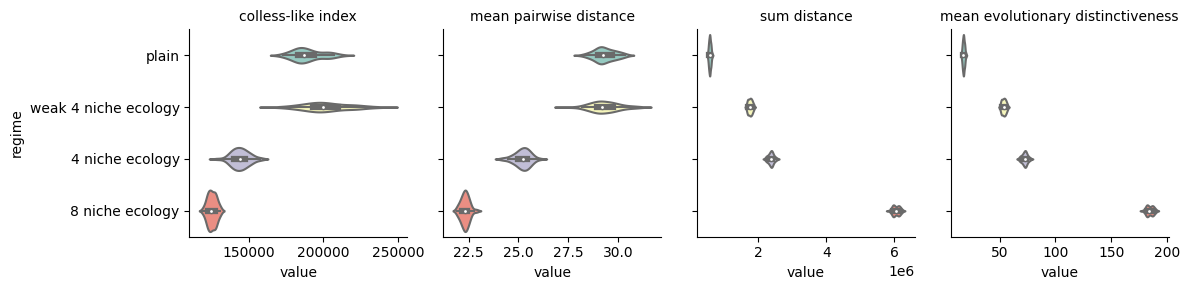

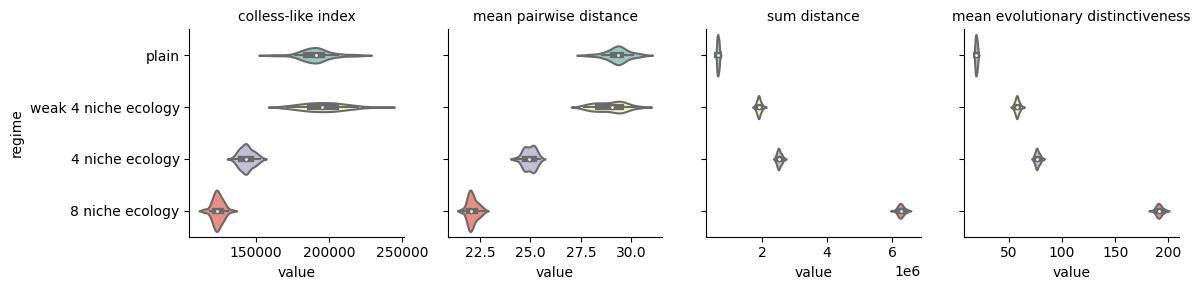

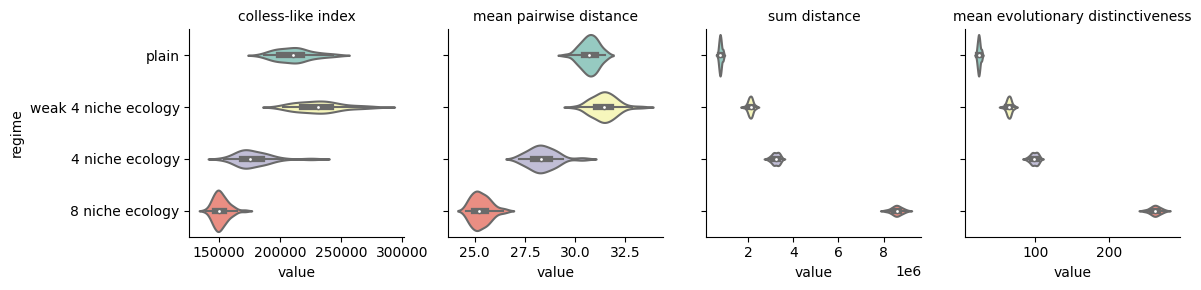

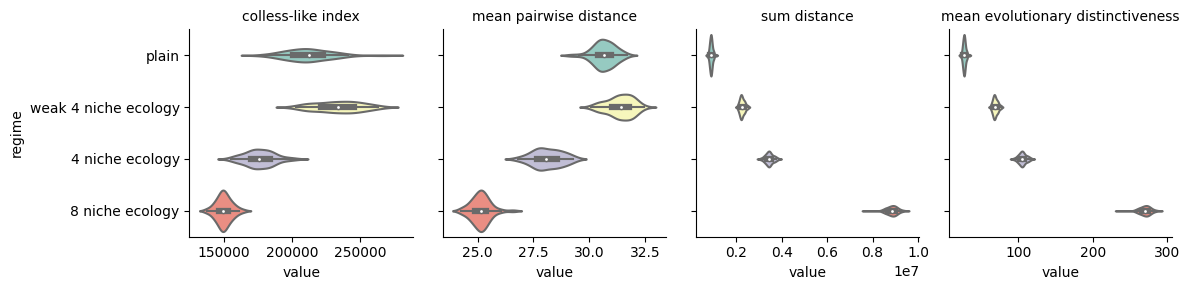

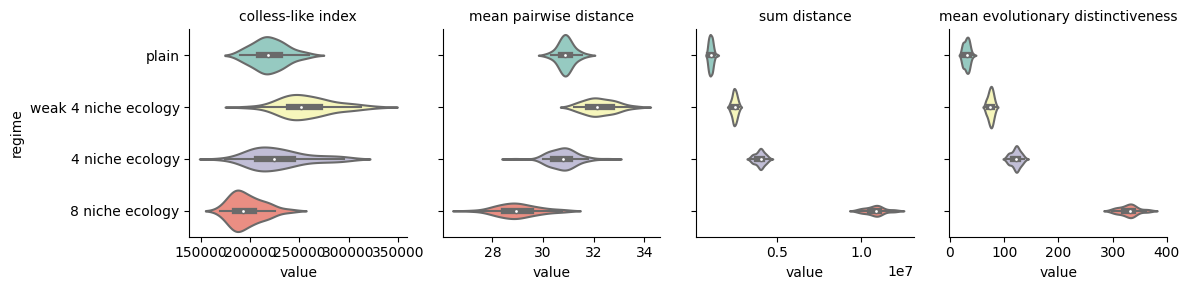

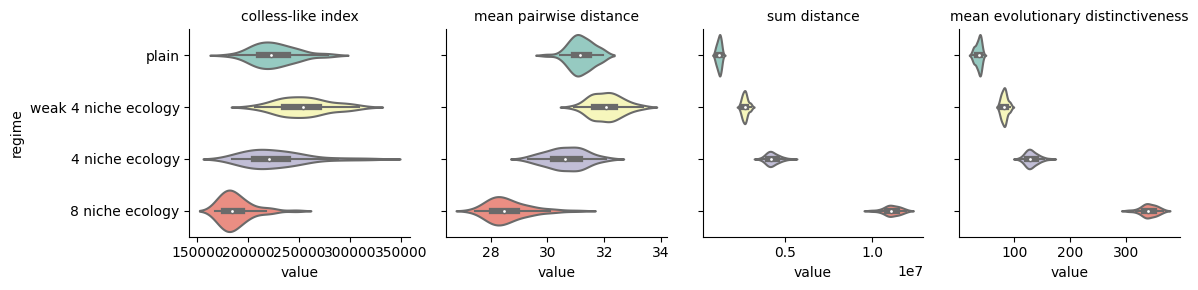

In [18]:
def make_do_plot(plotter):
    def do_plot(data, col, x, y):
        g = sns.FacetGrid(
            data,
            col=col,
            sharex=False,
        ).set_titles(template="{col_name}")
        g.map(
            plotter,
            x,
            y,
            order=[
                "plain",
                "weak 4 niche ecology",
                "4 niche ecology",
                "8 niche ecology",
            ],
            palette=sns.color_palette("Set3", 4),
        )

    return do_plot


for viz, (group, group_df) in it.product(
    [
        sns.barplot,
        sns.boxplot,
        sns.violinplot,
    ],
    melted_df.groupby(sensitivity_analysis_variables),
):
    do_plot = make_do_plot(viz)
    do_plot.__name__ = viz.__name__
    tp.tee(
        do_plot,
        data=group_df,
        col="phylometric",
        x="value",
        y="regime",
        teeplot_outattrs={
            **{
                "nuisance": "spatial-structure",
            },
            **dict(
                zip(sensitivity_analysis_variables, group),
            ),
        },
    )


# stats: kruskal wallace among regimes


In [19]:
records = []
for phylometric in phylometrics:
    for group, group_df in df[(df["a"] == "collapsed-phylogeny")].groupby(
        sensitivity_analysis_variables,
        as_index=False,
    ):
        kw_result, n = scipy_stats.kruskal(
            *(
                quality_series
                for quality, quality_series in group_df.groupby(["regime"])[
                    phylometric
                ]
            )
        ), min(group_df.groupby(["regime"]).count()["a"])
        records.append(
            {
                **{
                    "n": n,
                    "N": len([*group_df.groupby(["regime"])]),
                    "phylometric": phylometric,
                },
                **dict(zip(["statistic", "p"], kw_result)),
                **dict(zip(sensitivity_analysis_variables, group)),
            }
        )

with pd.option_context("display.max_colwidth", None, "display.max_rows", None):
    out_df = (
        pd.DataFrame.from_records(records)
        .sort_values(
            sensitivity_analysis_variables,
        )
        .reset_index(drop=True)
    )
    display(out_df)
    os.makedirs("outdata", exist_ok=True)
    out_df.to_csv(
        "outdata/a=phylostatistics-comparison-between-regimes-spatial-nuisance-kwallis+ext=.csv",
        index=False,
    )


n  N                        phylometric   statistic             p  epoch  \
0   50  4                 colless-like index  172.713564  3.302345e-37      0   
1   50  4             mean pairwise distance  167.921194  3.576287e-36      0   
2   50  4                       sum distance  186.567164  3.366062e-40      0   
3   50  4  mean evolutionary distinctiveness  186.567164  3.366062e-40      0   
4   50  4                 colless-like index  168.730078  2.392307e-36      0   
5   50  4             mean pairwise distance  169.356466  1.752241e-36      0   
6   50  4                       sum distance  186.567164  3.366062e-40      0   
7   50  4  mean evolutionary distinctiveness  186.567164  3.366062e-40      0   
8   50  4                 colless-like index  167.439630  4.543457e-36      2   
9   50  4             mean pairwise distance  175.699248  7.484610e-38      2   
10  50  4                       sum distance  186.567164  3.366062e-40      2   
11  50  4  mean evolutionary distinctiveness  186.567164  3.366062e-40      2   
12  50  4                 colless-like index  173.646030  2.077285e-37      2   
13  50  4             mean pairwise distance  175.873540  6.863331e-38      2   
14  50  4                       sum distance  186.567164  3.366062e-40      2   
15  50  4  mean evolutionary distinctiveness  186.567164  3.366062e-40      2   
16  50  4                 colless-like index  103.023940  3.476966e-22      7   
17  50  4             mean pairwise distance  156.732048  9.296771e-34      7   
18  50  4                       sum distance  186.567164  3.366062e-40      7   
19  50  4  mean evolutionary distinctiveness  186.567164  3.366062e-40      7   
20  50  4                 colless-like index  108.658758  2.132878e-23      7   
21  50  4             mean pairwise distance  154.969254  2.231993e-33      7   
22  50  4                       sum distance  186.567164  3.366062e-40      7   
23  50  4  mean evolutionary distinctiveness  186.567164  3.366062e-40      7   

                    mut_distn  
0       np.random.exponential  
1       np.random.exponential  
2       np.random.exponential  
3       np.random.exponential  
4   np.random.standard_normal  
5   np.random.standard_normal  
6   np.random.standard_normal  
7   np.random.standard_normal  
8       np.random.exponential  
9       np.random.exponential  
10      np.random.exponential  
11      np.random.exponential  
12  np.random.standard_normal  
13  np.random.standard_normal  
14  np.random.standard_normal  
15  np.random.standard_normal  
16      np.random.exponential  
17      np.random.exponential  
18      np.random.exponential  
19      np.random.exponential  
20  np.random.standard_normal  
21  np.random.standard_normal  
22  np.random.standard_normal  
23  np.random.standard_normal

In [20]:
records = []
for phylometric in phylometrics:
    for group, group_df in df[(df["a"] == "collapsed-phylogeny")].groupby(
        sensitivity_analysis_variables, as_index=False
    ):
        for regime1, regime2 in it.combinations(
            group_df["regime"].unique(), 2
        ):
            kw_result, n = scipy_stats.wilcoxon(
                *zip(
                    *zip(
                        group_df[group_df["regime"] == regime1][phylometric],
                        group_df[group_df["regime"] == regime2][phylometric],
                    )
                ),
            ), min(group_df.groupby(["regime"]).count()["a"])
            records.append(
                {
                    **{
                        "regime1": regime1,
                        "regime2": regime2,
                        "n": n,
                        "phylometric": phylometric,
                    },
                    **dict(zip(["statistic", "p"], kw_result)),
                    **dict(zip(sensitivity_analysis_variables, group)),
                }
            )

with pd.option_context("display.max_colwidth", None, "display.max_rows", None):
    out_df = (
        pd.DataFrame.from_records(records)
        .sort_values(
            [*sensitivity_analysis_variables, "regime1", "regime2"],
        )
        .reset_index(drop=True)
    )
    display(out_df)
    os.makedirs("outdata", exist_ok=True)
    out_df.to_csv(
        "outdata/a=phylostatistics-comparison-between-regimes-allpairs-spatial-nuisance-wilcox+ext=.csv",
        index=False,
    )


regime1               regime2   n  \
0         4 niche ecology       8 niche ecology  50   
1         4 niche ecology       8 niche ecology  50   
2         4 niche ecology       8 niche ecology  50   
3         4 niche ecology       8 niche ecology  50   
4         4 niche ecology                 plain  50   
5         4 niche ecology                 plain  50   
6         4 niche ecology                 plain  50   
7         4 niche ecology                 plain  50   
8         4 niche ecology  weak 4 niche ecology  50   
9         4 niche ecology  weak 4 niche ecology  50   
10        4 niche ecology  weak 4 niche ecology  50   
11        4 niche ecology  weak 4 niche ecology  50   
12                  plain       8 niche ecology  50   
13                  plain       8 niche ecology  50   
14                  plain       8 niche ecology  50   
15                  plain       8 niche ecology  50   
16   weak 4 niche ecology       8 niche ecology  50   
17   weak 4 niche ecology       8 niche ecology  50   
18   weak 4 niche ecology       8 niche ecology  50   
19   weak 4 niche ecology       8 niche ecology  50   
20   weak 4 niche ecology                 plain  50   
21   weak 4 niche ecology                 plain  50   
22   weak 4 niche ecology                 plain  50   
23   weak 4 niche ecology                 plain  50   
24        8 niche ecology       4 niche ecology  50   
25        8 niche ecology       4 niche ecology  50   
26        8 niche ecology       4 niche ecology  50   
27        8 niche ecology       4 niche ecology  50   
28        8 niche ecology  weak 4 niche ecology  50   
29        8 niche ecology  weak 4 niche ecology  50   
30        8 niche ecology  weak 4 niche ecology  50   
31        8 niche ecology  weak 4 niche ecology  50   
32                  plain       4 niche ecology  50   
33                  plain       4 niche ecology  50   
34                  plain       4 niche ecology  50   
35                  plain       4 niche ecology  50   
36                  plain       8 niche ecology  50   
37                  plain       8 niche ecology  50   
38                  plain       8 niche ecology  50   
39                  plain       8 niche ecology  50   
40                  plain  weak 4 niche ecology  50   
41                  plain  weak 4 niche ecology  50   
42                  plain  weak 4 niche ecology  50   
43                  plain  weak 4 niche ecology  50   
44   weak 4 niche ecology       4 niche ecology  50   
45   weak 4 niche ecology       4 niche ecology  50   
46   weak 4 niche ecology       4 niche ecology  50   
47   weak 4 niche ecology       4 niche ecology  50   
48        4 niche ecology  weak 4 niche ecology  50   
49        4 niche ecology  weak 4 niche ecology  50   
50        4 niche ecology  weak 4 niche ecology  50   
51        4 niche ecology  weak 4 niche ecology  50   
52        8 niche ecology       4 niche ecology  50   
53        8 niche ecology       4 niche ecology  50   
54        8 niche ecology       4 niche ecology  50   
55        8 niche ecology       4 niche ecology  50   
56        8 niche ecology  weak 4 niche ecology  50   
57        8 niche ecology  weak 4 niche ecology  50   
58        8 niche ecology  weak 4 niche ecology  50   
59        8 niche ecology  weak 4 niche ecology  50   
60                  plain       4 niche ecology  50   
61                  plain       4 niche ecology  50   
62                  plain       4 niche ecology  50   
63                  plain       4 niche ecology  50   
64                  plain       8 niche ecology  50   
65                  plain       8 niche ecology  50   
66                  plain       8 niche ecology  50   
67                  plain       8 niche ecology  50   
68                  plain  weak 4 niche ecology  50   
69                  plain  weak 4 niche ecology  50   
70                  plain  weak 4 niche ecology  50   
71                  plain  weak 4 niche ecology  50   
72 

# reconstructed phylogenetic data


In [21]:
df["quality"] = df.apply(
    lambda row: {
        ("reconstructed-tree", 3.0): "33% resolution",
        ("reconstructed-tree", 10.0): "10% resolution",
        ("reconstructed-tree", 30.0): "3% resolution",
        ("reconstructed-tree", 100.0): "1% resolution",
        ("collapsed-phylogeny", 0): "perfect resolution",
    }.get(
        tuple(row[["a", "resolution"]].fillna(0)),
        np.nan,  # default
    ),
    axis="columns",
)
df["quality"].unique()


array(['perfect resolution', '10% resolution', '1% resolution',
       '3% resolution', '33% resolution'], dtype=object)

In [22]:
melted_df = df.melt(
    id_vars=evolutionary_variables
    + methodological_variables
    + sensitivity_analysis_variables
    + ["regime", "a", "quality"],
    value_vars=phylometrics,
)
melted_df["phylometric"] = melted_df["variable"]
melted_df


num_niches  resolution  epoch                  mut_distn  \
0               4         NaN      7  np.random.standard_normal   
1               4         NaN      7  np.random.standard_normal   
2               4         NaN      7  np.random.standard_normal   
3               4         NaN      7  np.random.standard_normal   
4               4         NaN      7  np.random.standard_normal   
...           ...         ...    ...                        ...   
23995           8         3.0      7      np.random.exponential   
23996           8        30.0      7      np.random.exponential   
23997           8       100.0      7      np.random.exponential   
23998           8        10.0      7      np.random.exponential   
23999           8        30.0      7      np.random.exponential   

                     regime                    a             quality  \
0      weak 4 niche ecology  collapsed-phylogeny  perfect resolution   
1      weak 4 niche ecology  collapsed-phylogeny  perfect resolution   
2      weak 4 niche ecology  collapsed-phylogeny  perfect resolution   
3      weak 4 niche ecology  collapsed-phylogeny  perfect resolution   
4      weak 4 niche ecology  collapsed-phylogeny  perfect resolution   
...                     ...                  ...                 ...   
23995       8 niche ecology   reconstructed-tree      33% resolution   
23996       8 niche ecology   reconstructed-tree       3% resolution   
23997       8 niche ecology   reconstructed-tree       1% resolution   
23998       8 niche ecology   reconstructed-tree      10% resolution   
23999       8 niche ecology   reconstructed-tree       3% resolution   

                                variable          value  \
0                     colless-like index  269758.311432   
1                     colless-like index  245694.126217   
2                     colless-like index  229733.780163   
3                     colless-like index  233461.802088   
4                     colless-like index  262782.396217   
...                                  ...            ...   
23995  mean evolutionary distinctiveness     313.221619   
23996  mean evolutionary distinctiveness     336.758774   
23997  mean evolutionary distinctiveness     309.332581   
23998  mean evolutionary distinctiveness     305.019302   
23999  mean evolutionary distinctiveness     330.335556   

                             phylometric  
0                     colless-like index  
1                     colless-like index  
2                     colless-like index  
3                     colless-like index  
4                     colless-like index  
...                                  ...  
23995  mean evolutionary distinctiveness  
23996  mean evolutionary distinctiveness  
23997  mean evolutionary distinctiveness  
23998  mean evolutionary distinctiveness  
23999  mean evolutionary distinctiveness  

[24000 rows x 10 columns]

teeplots/./col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=boxplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.png


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.pdf


teeplots/./col=phylometric+epoch=7+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=violinplot+x=value+y=quality+ext=.png


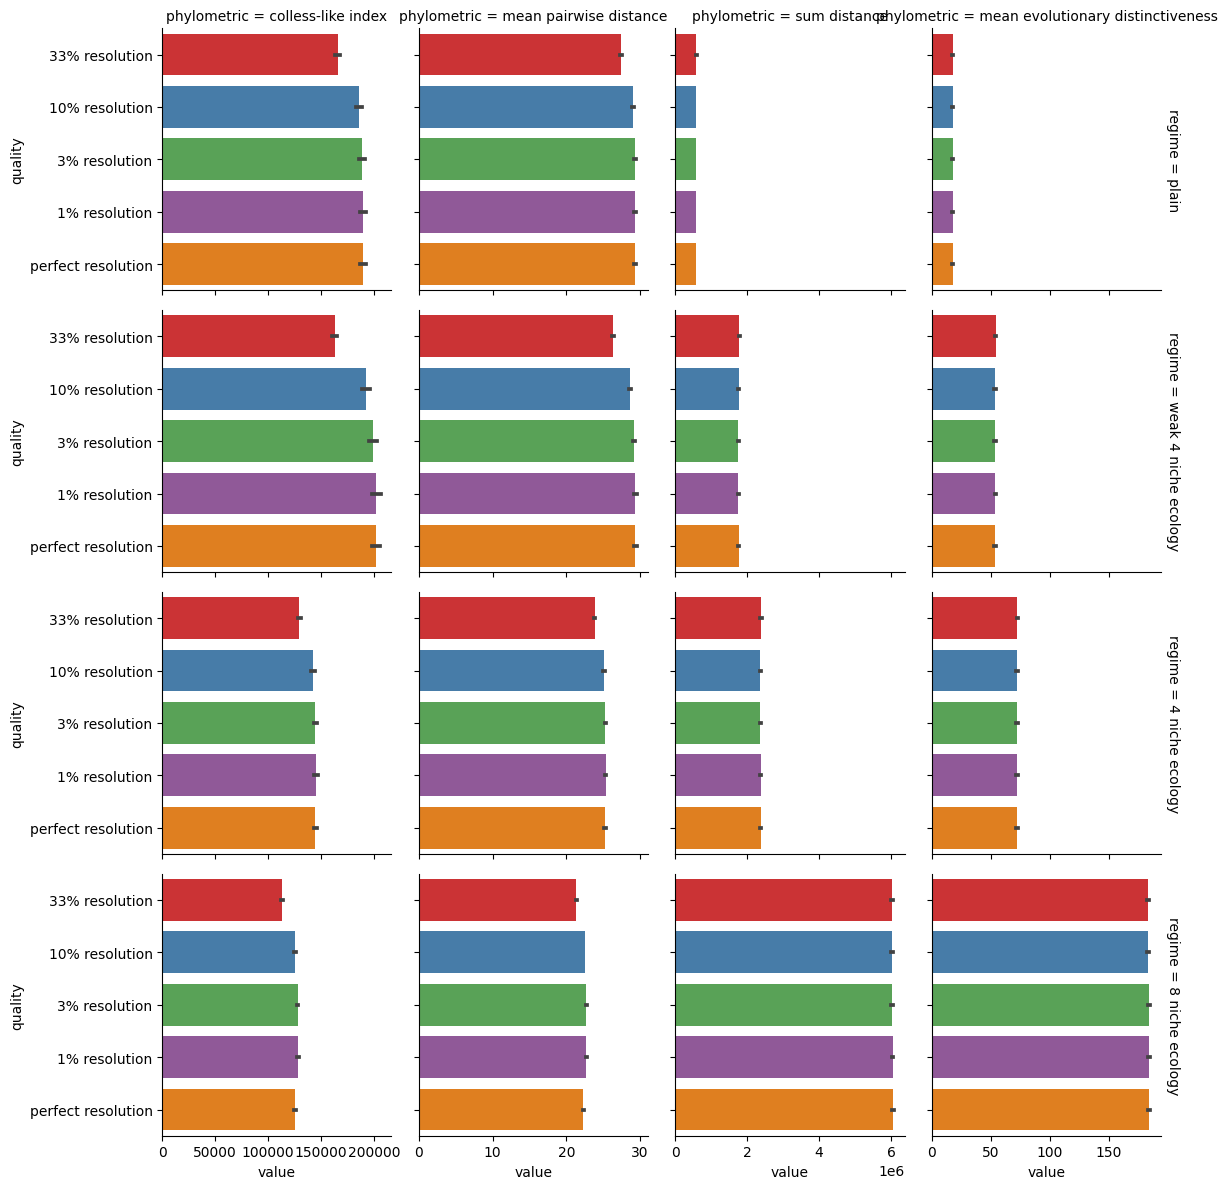

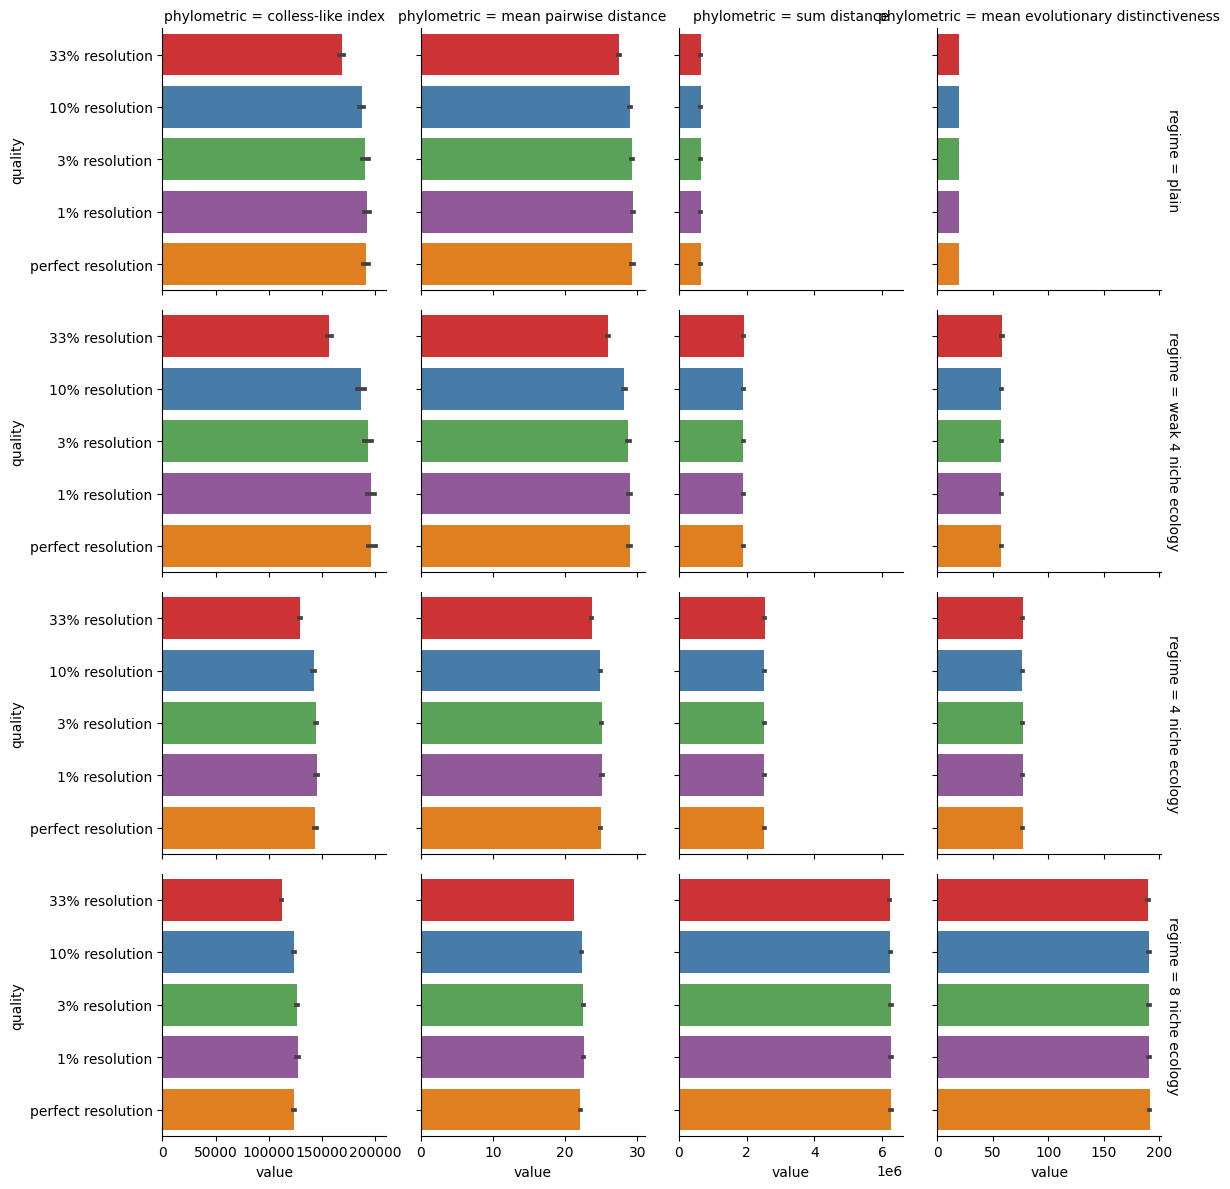

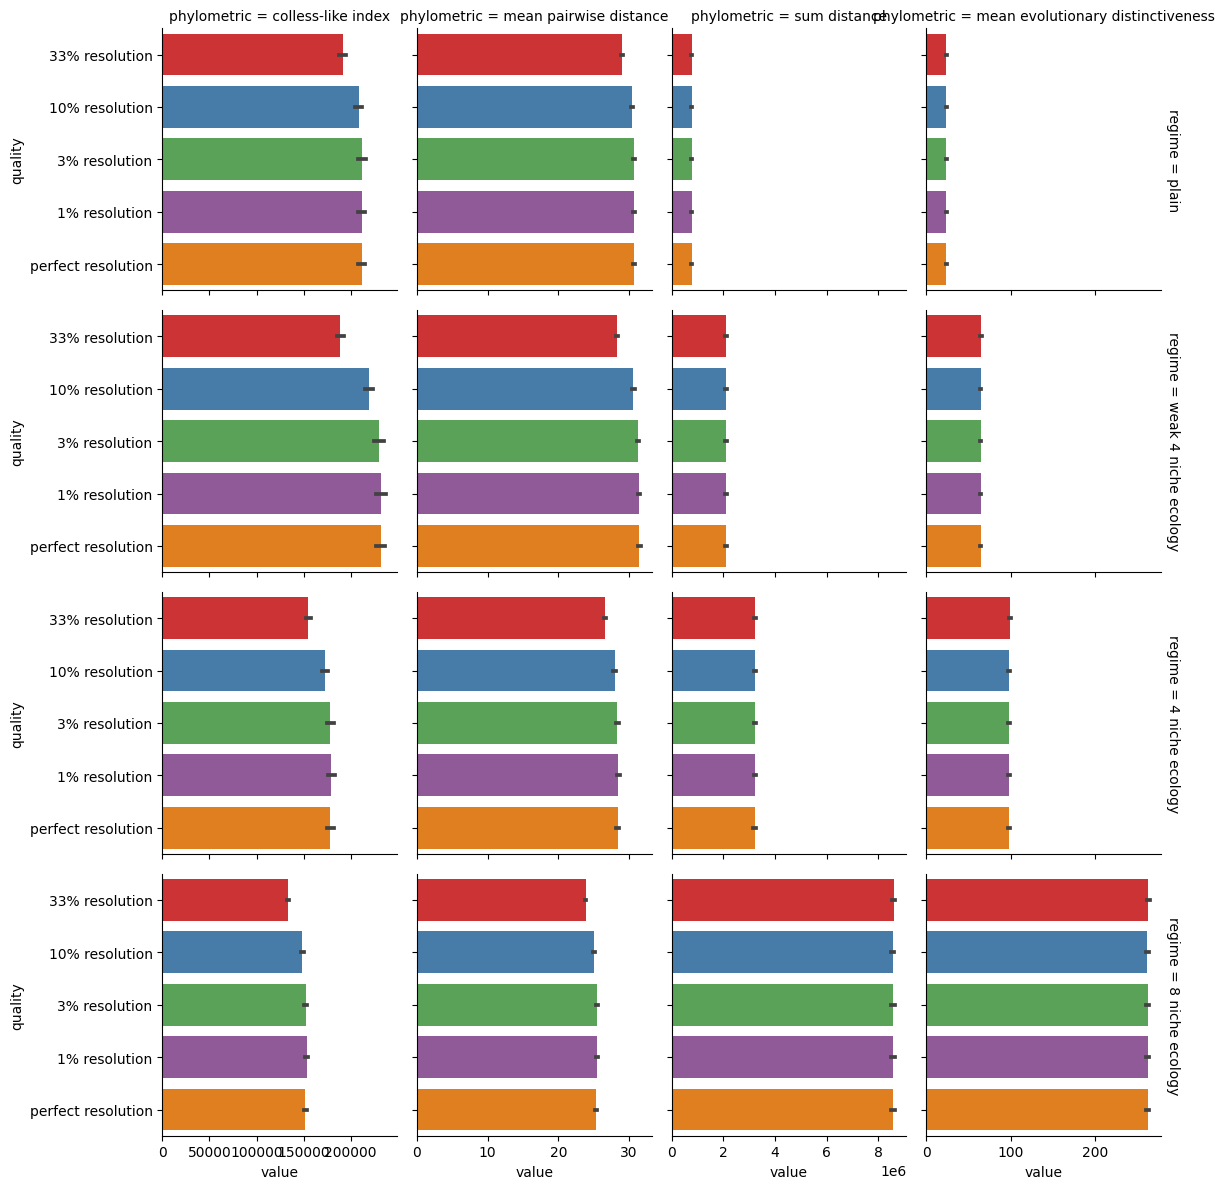

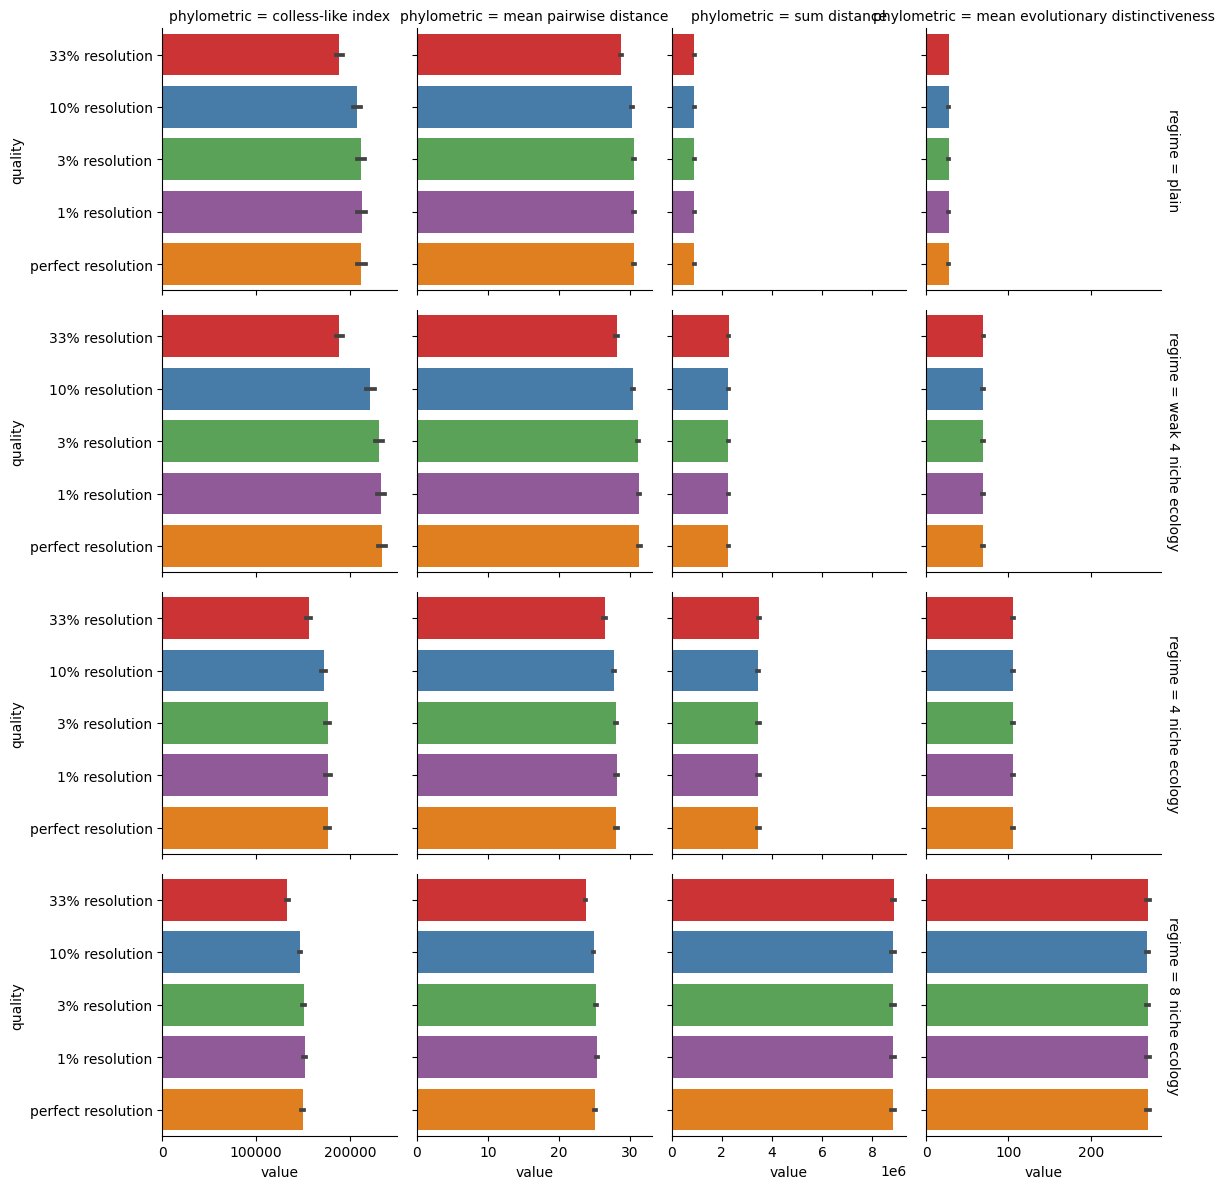

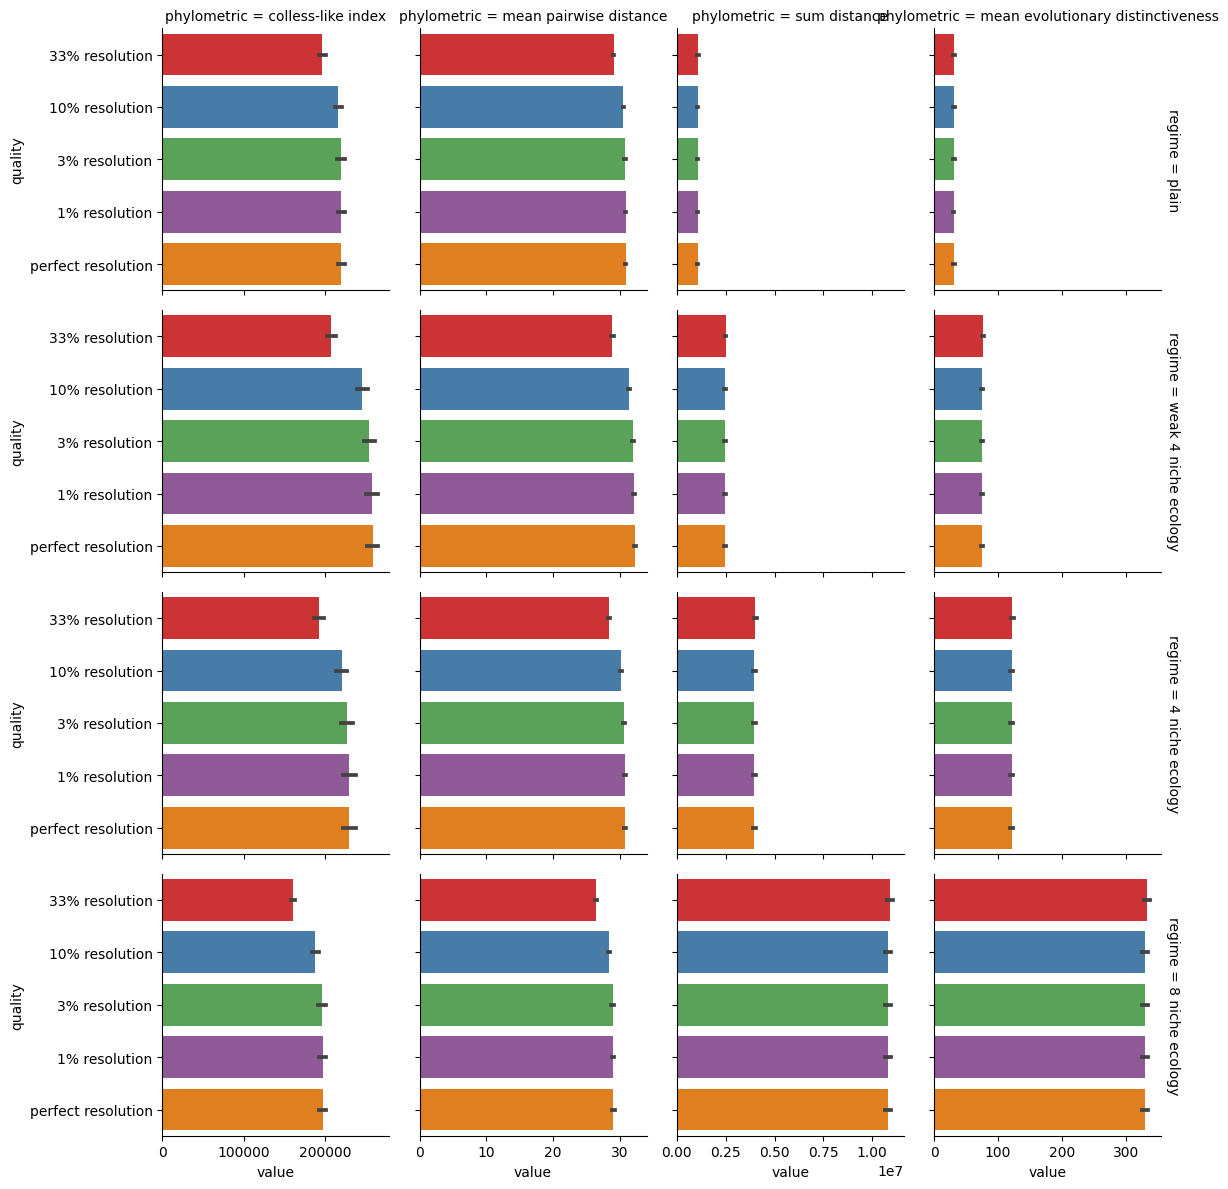

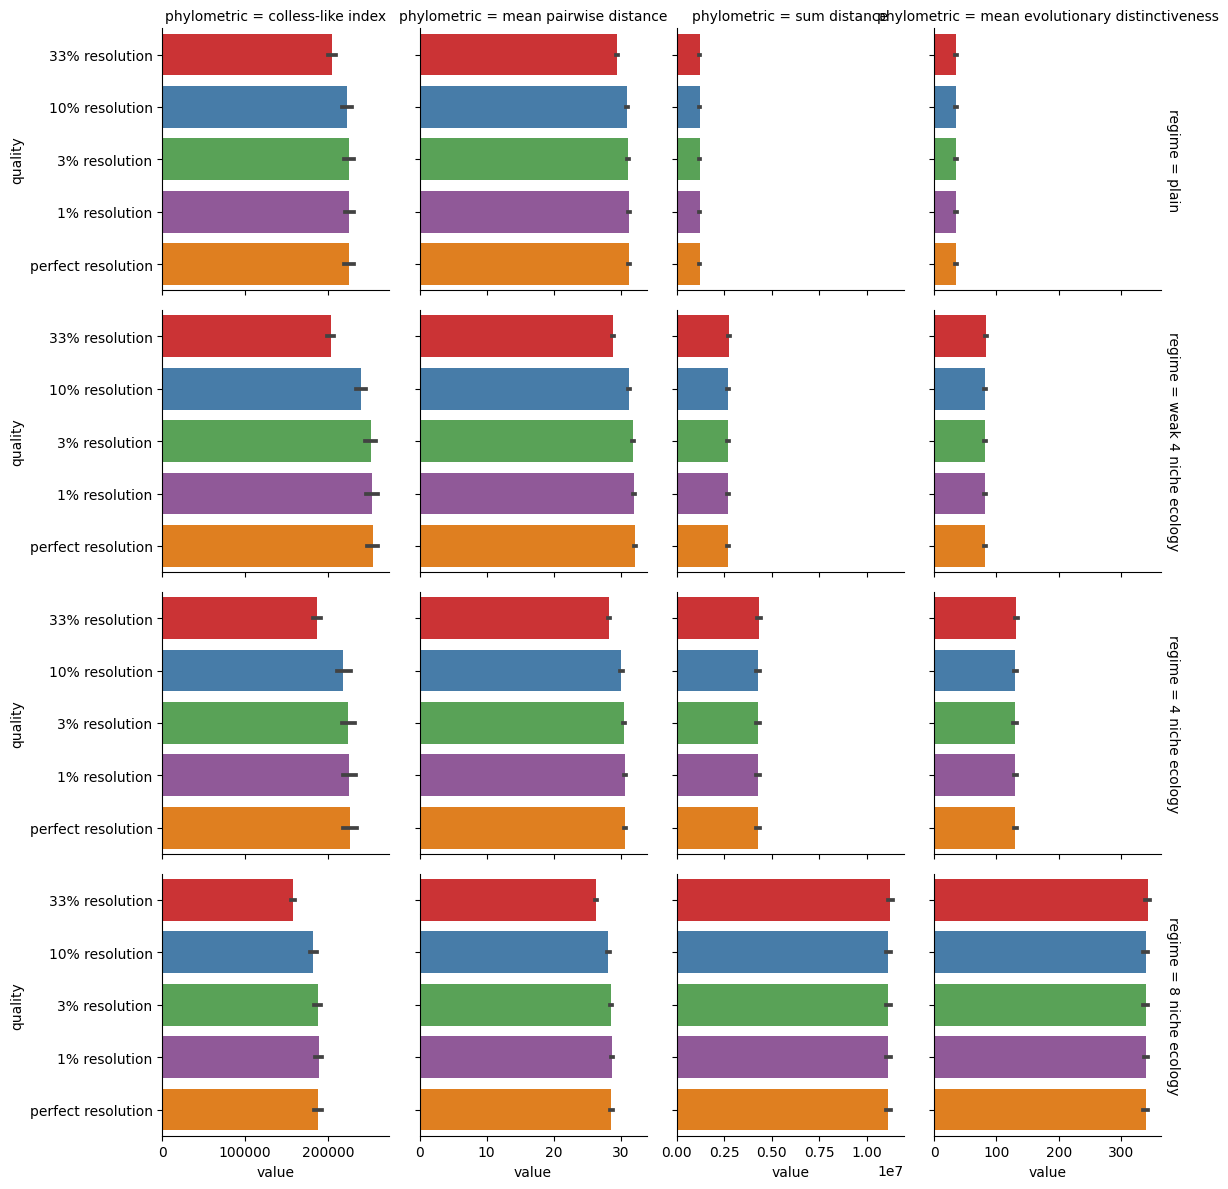

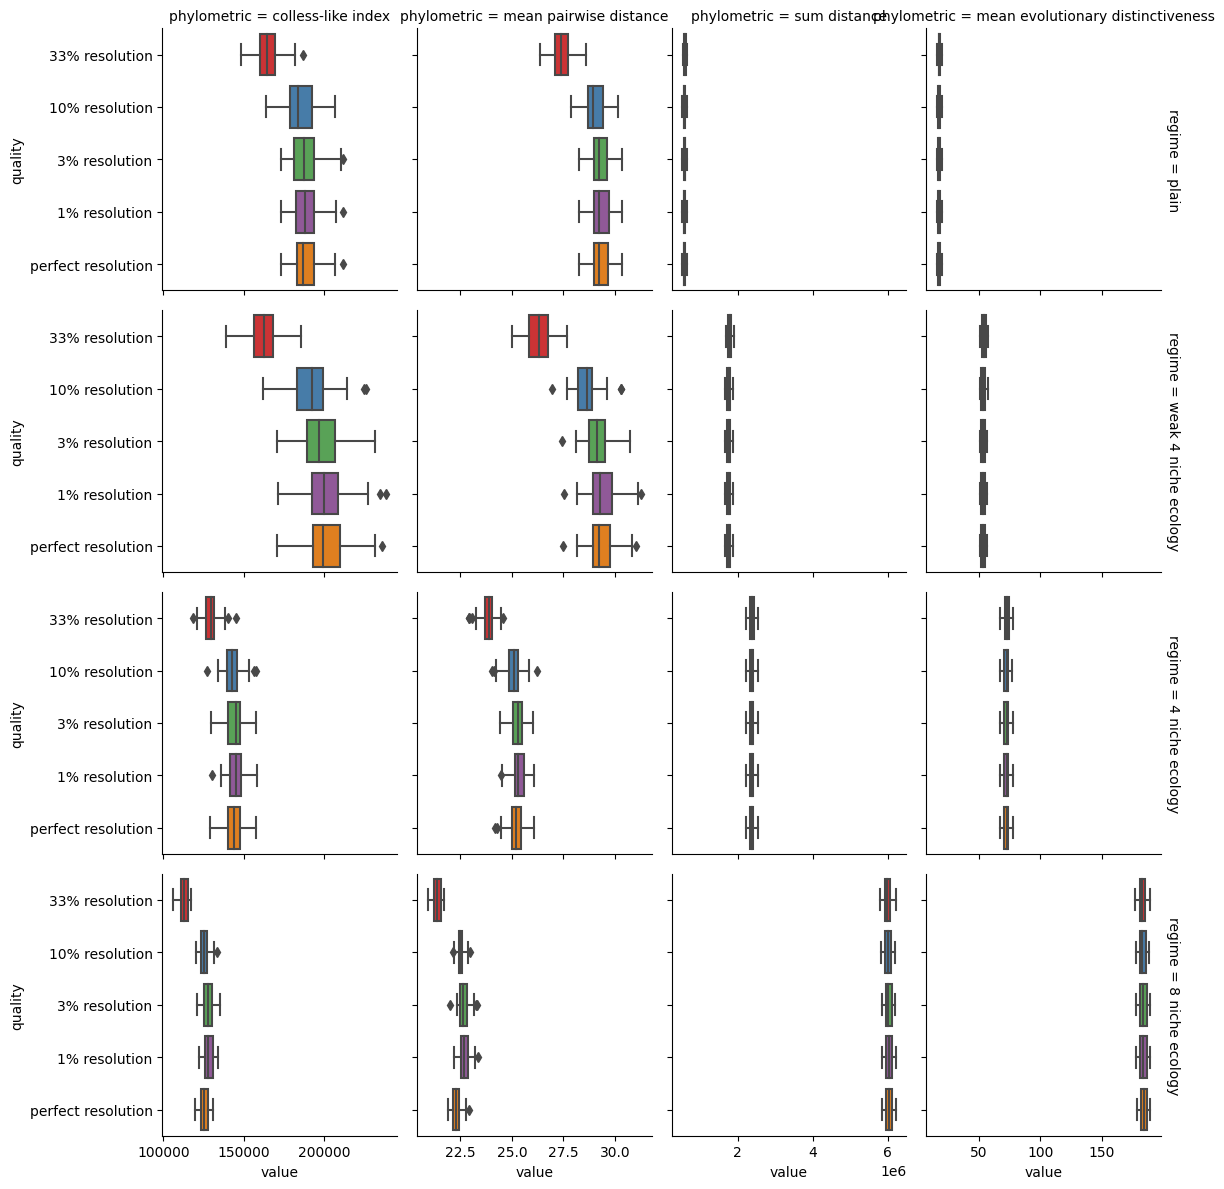

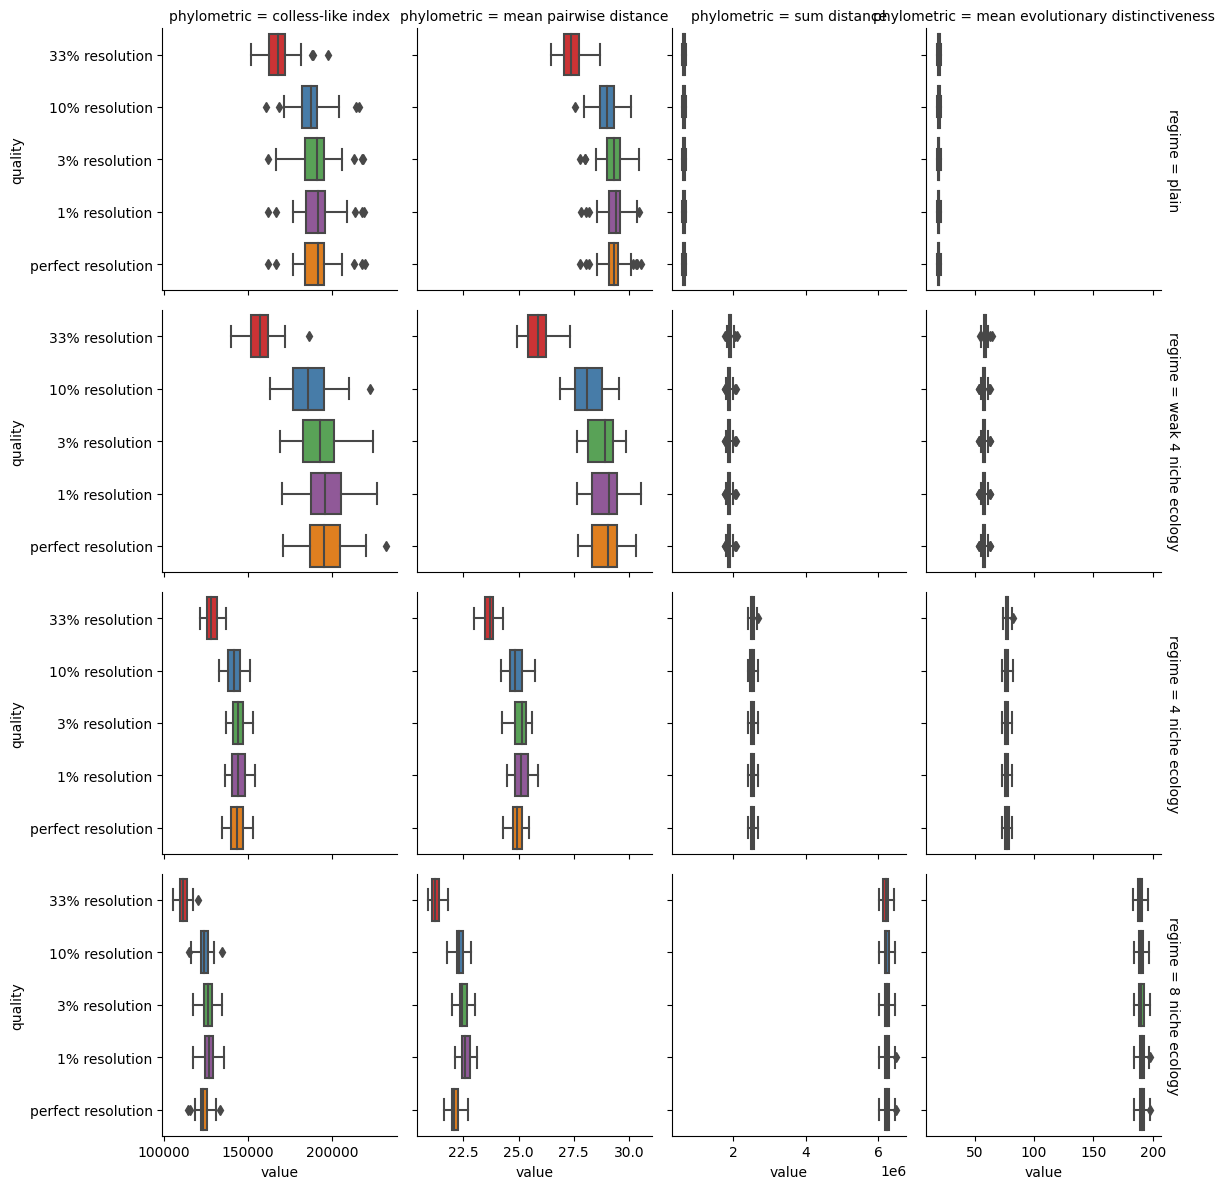

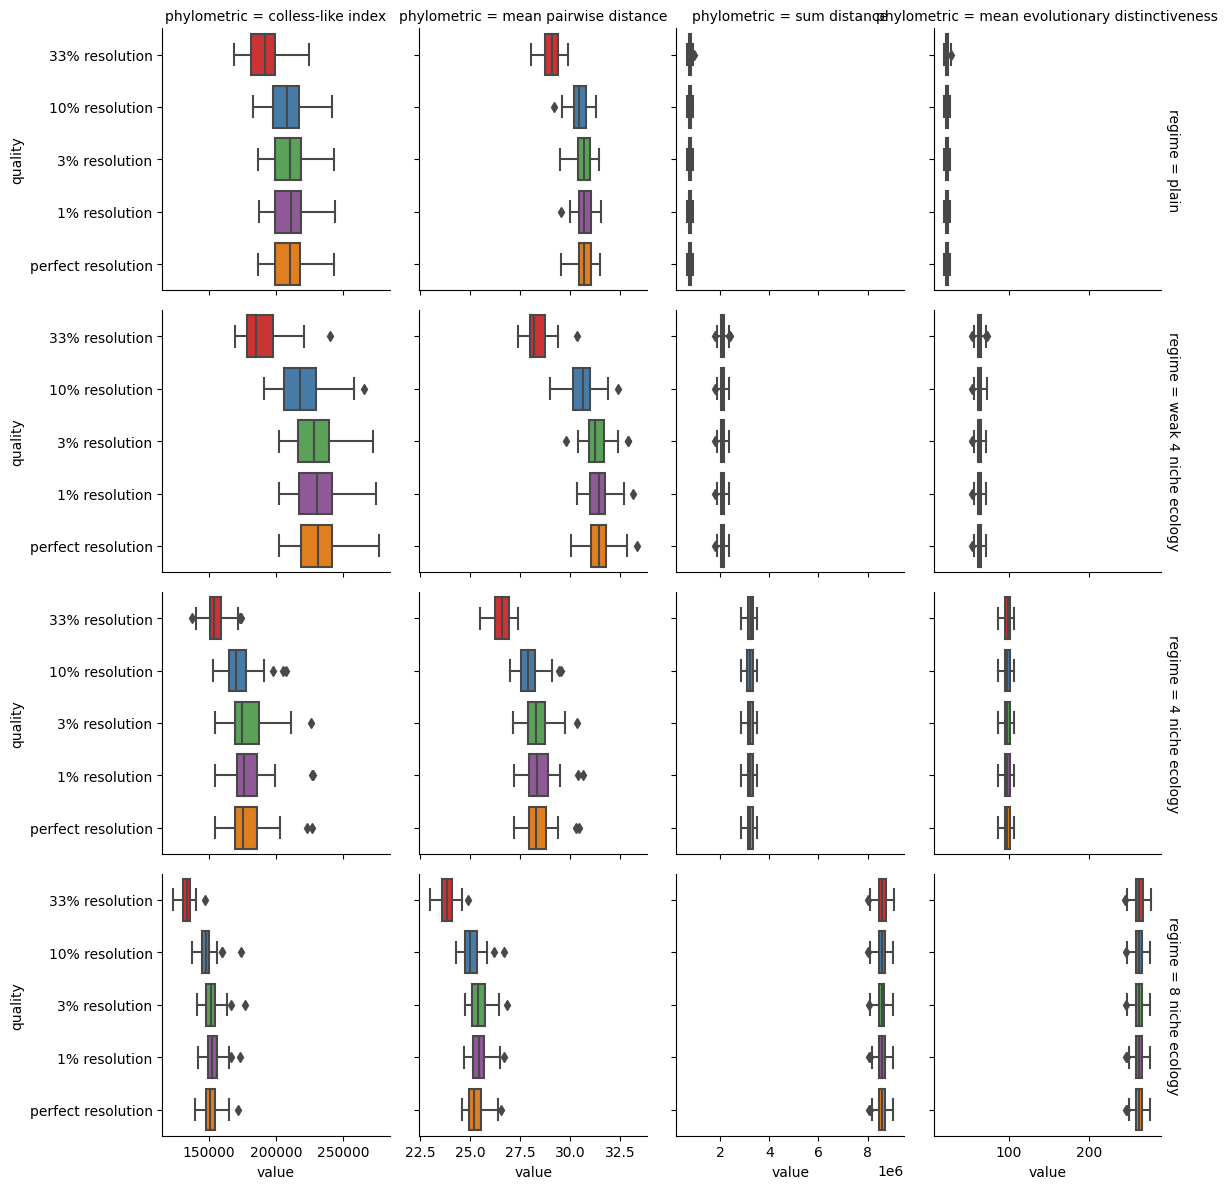

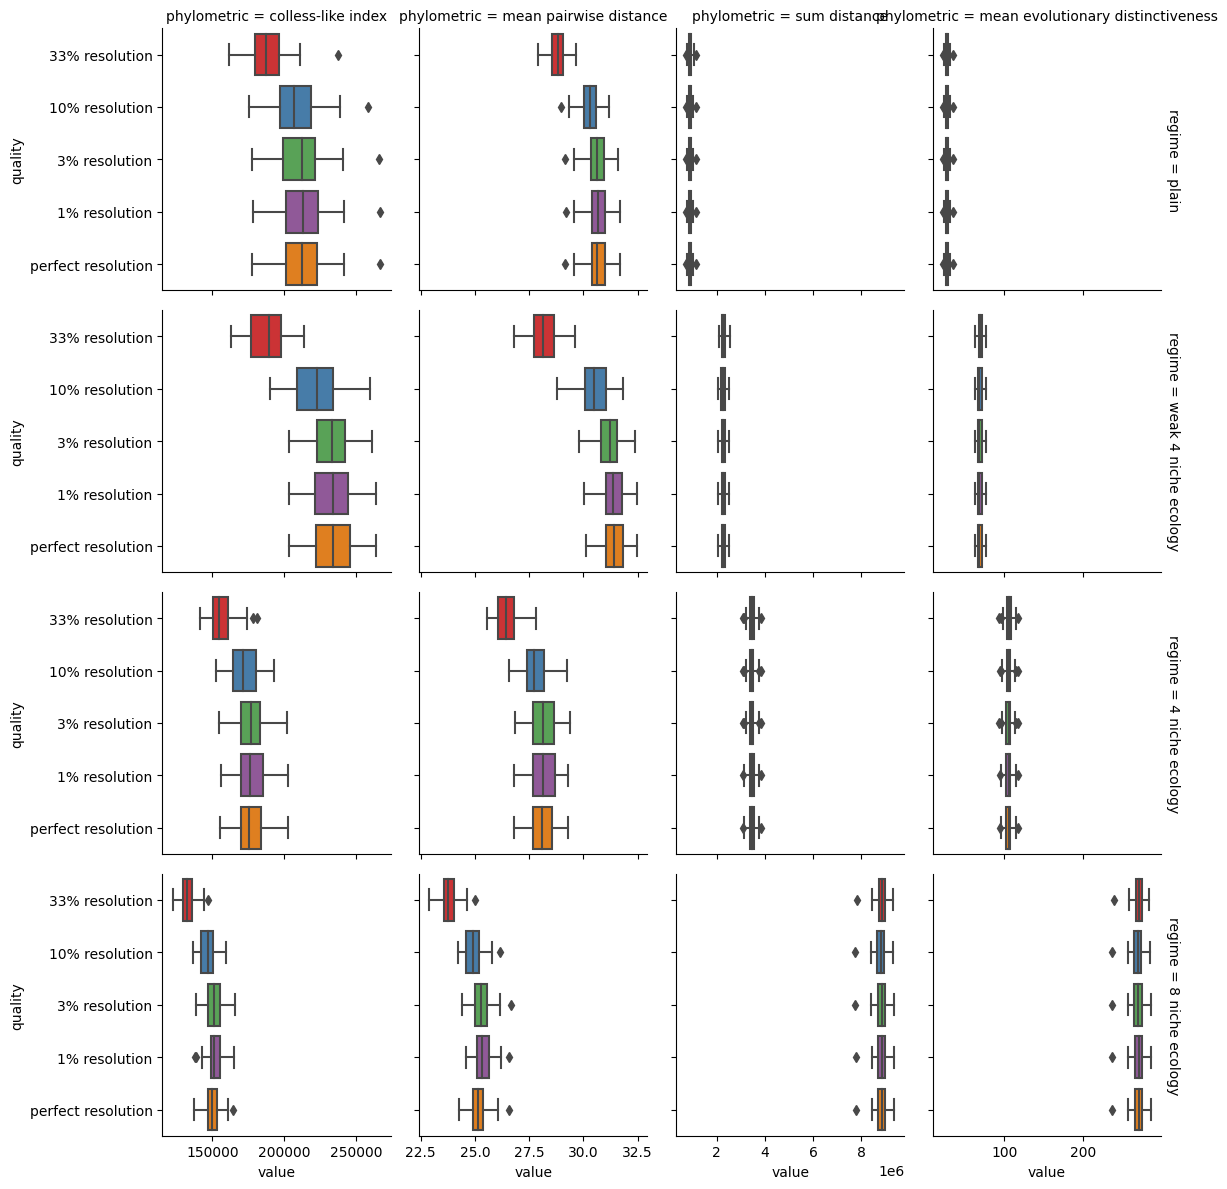

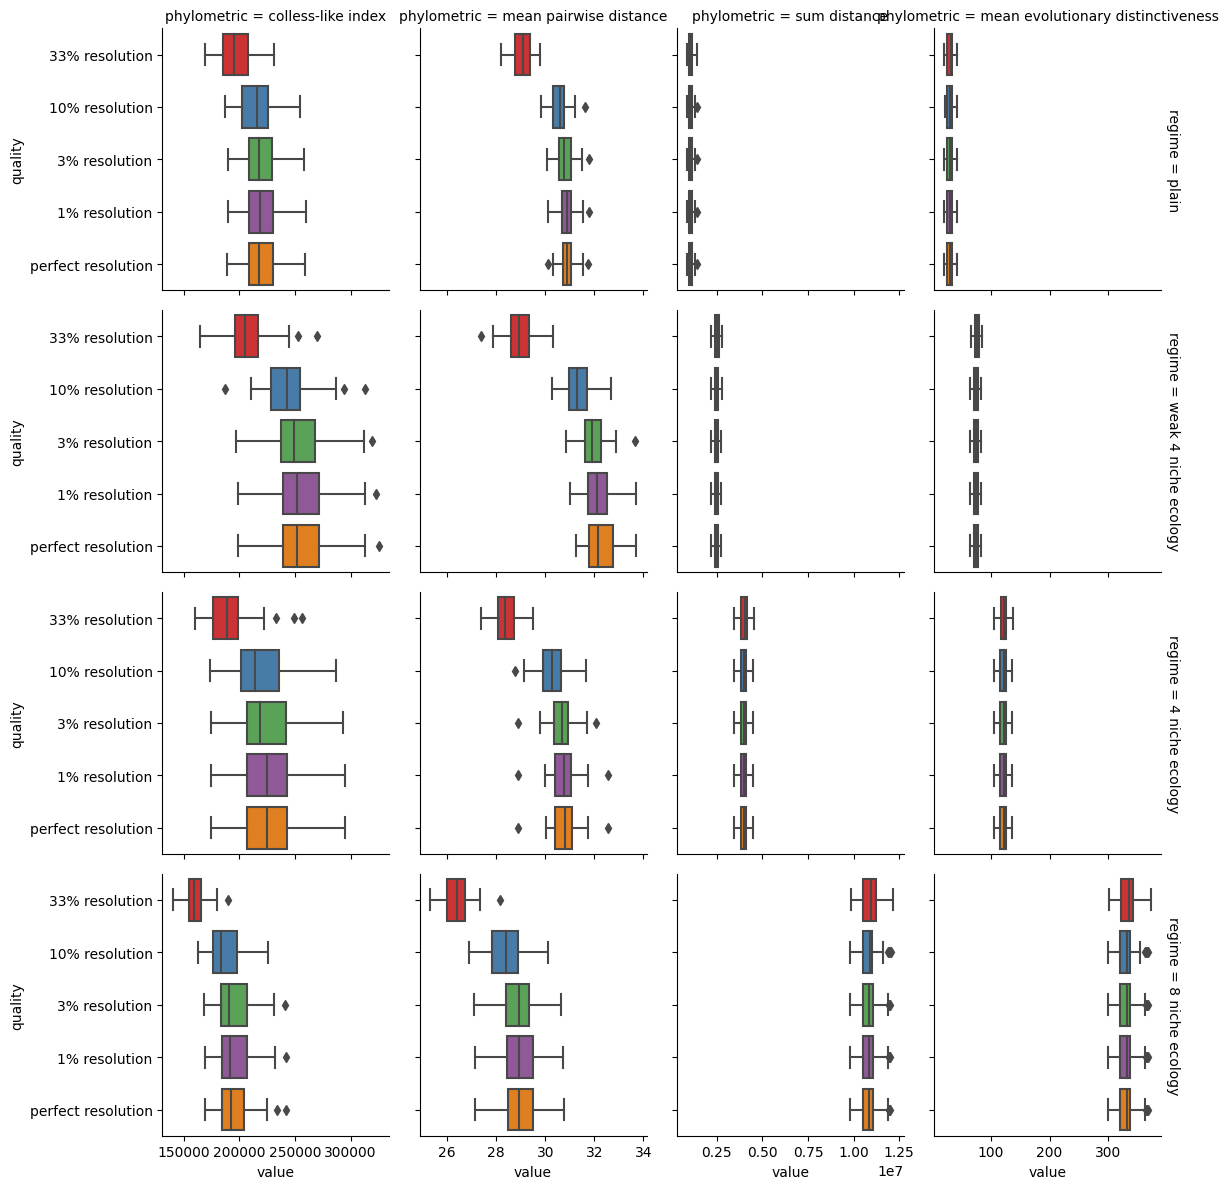

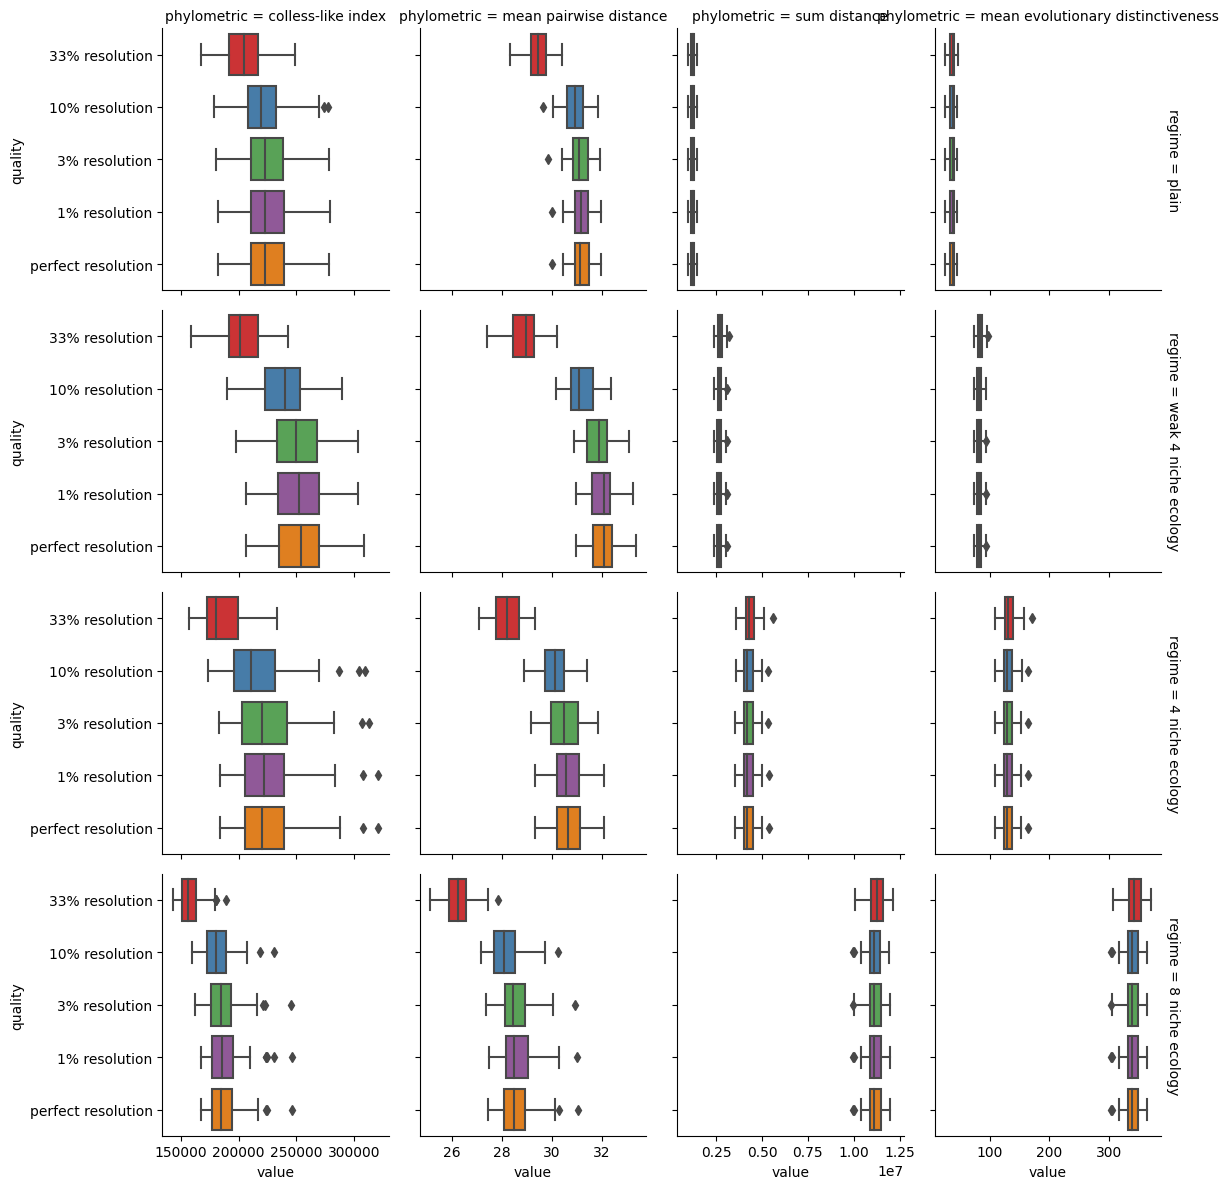

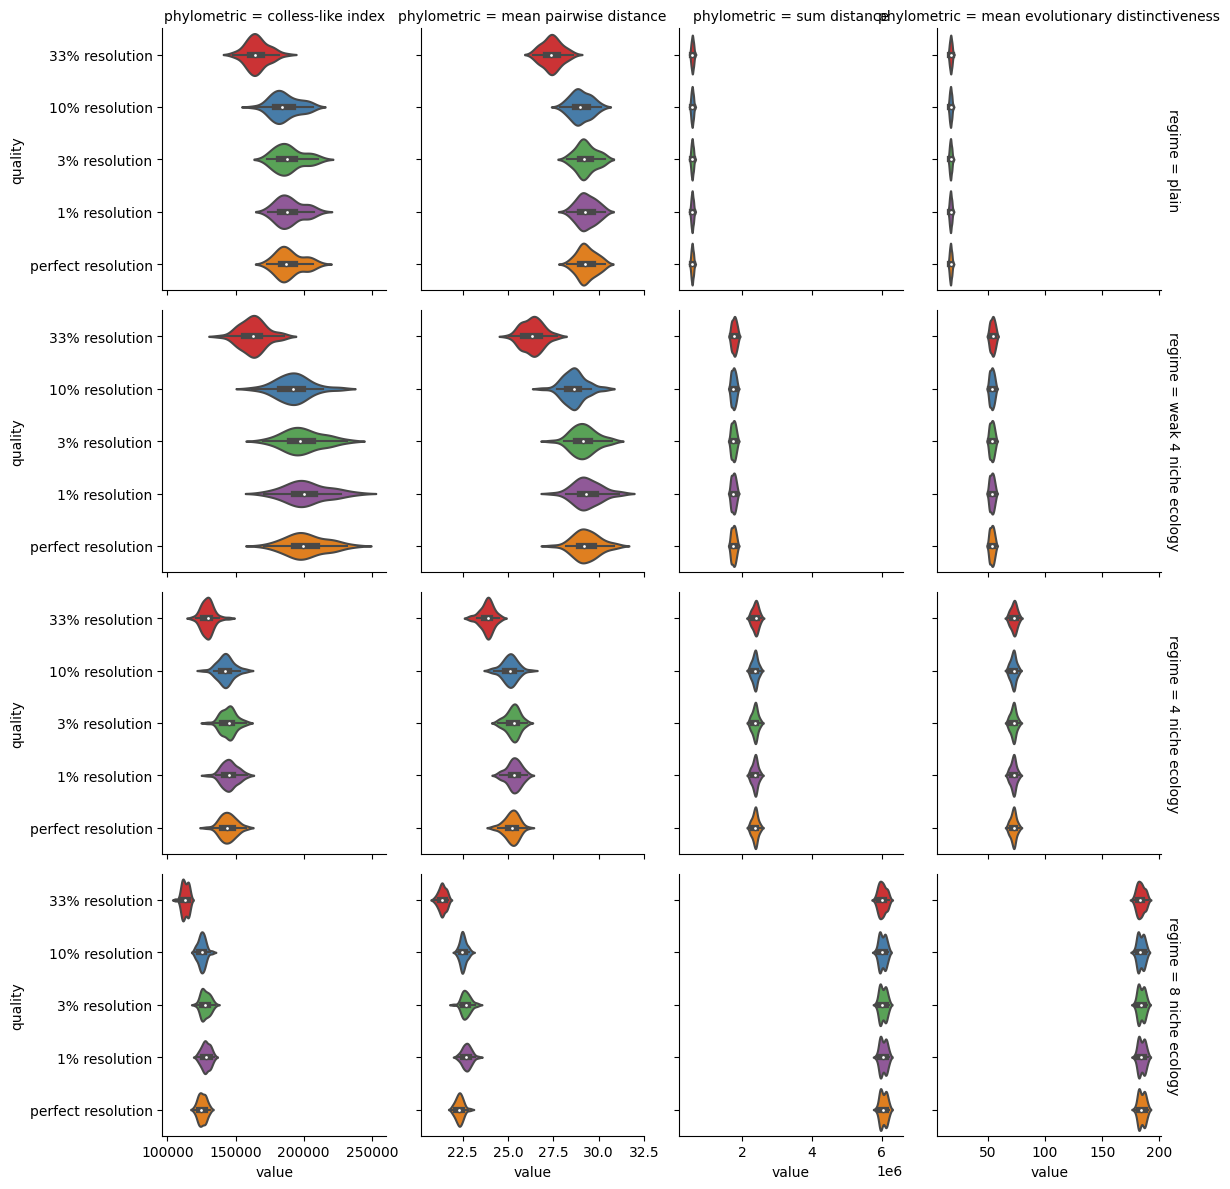

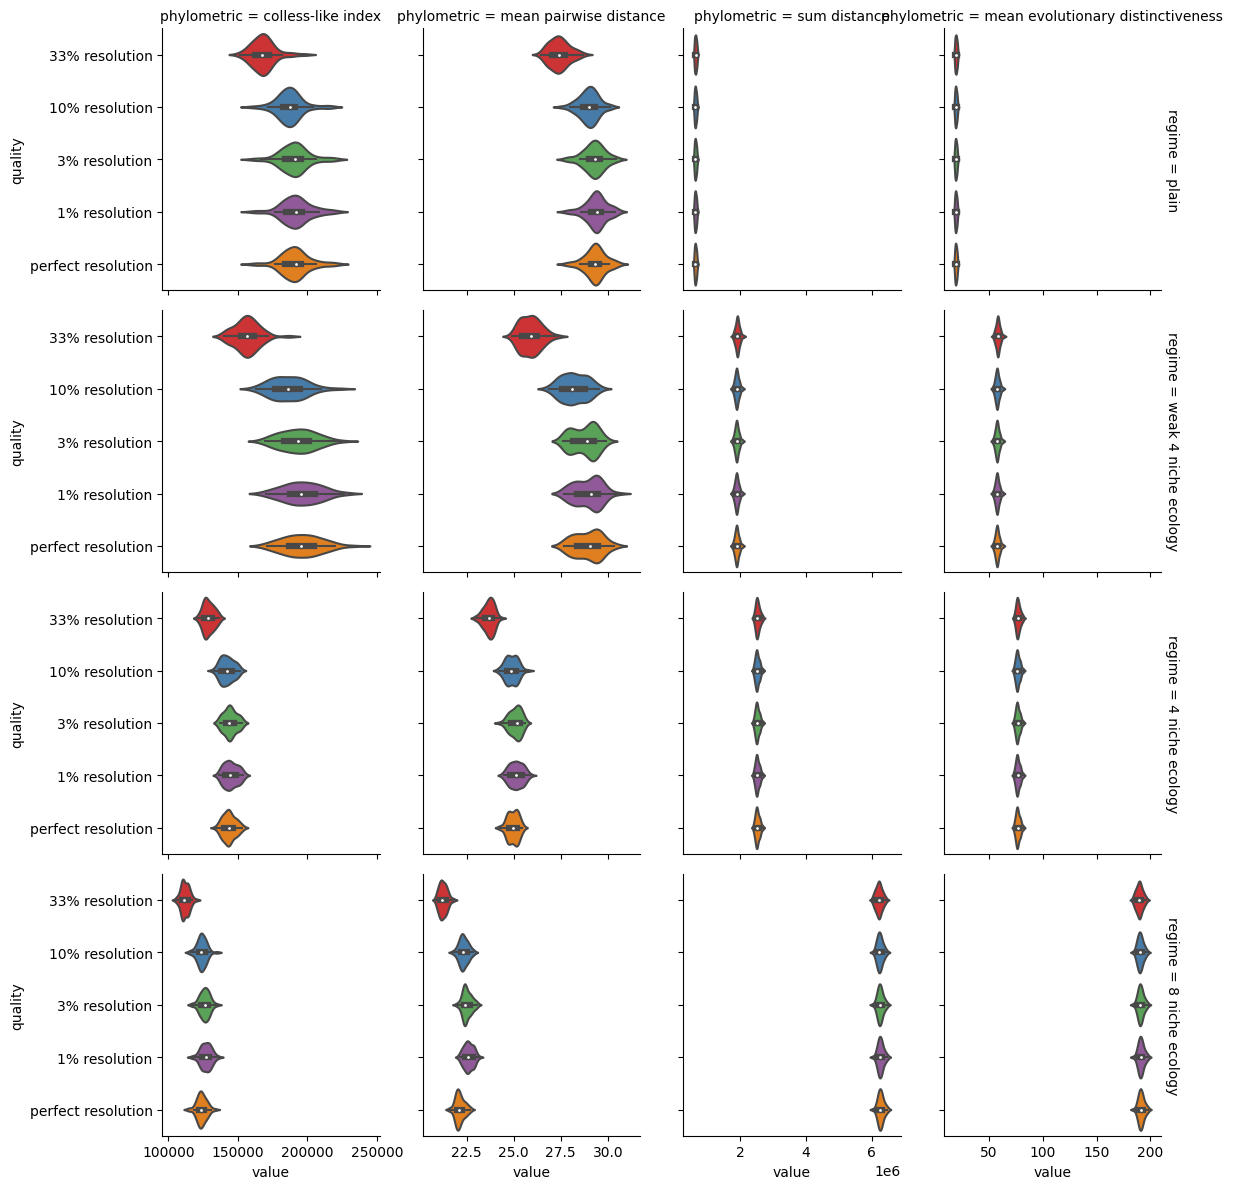

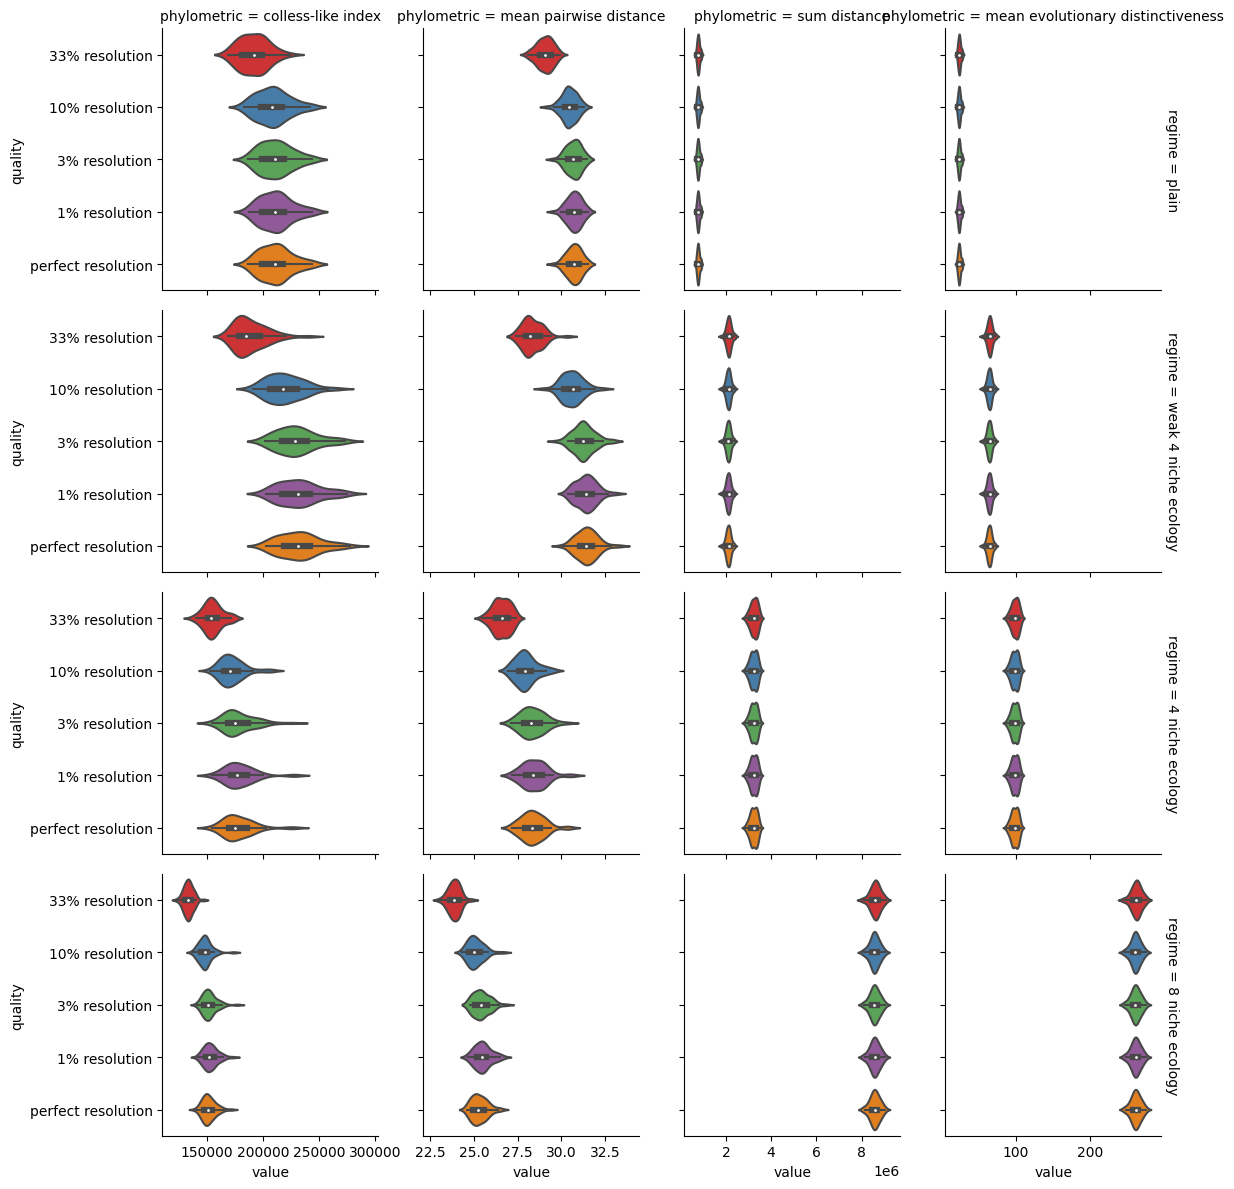

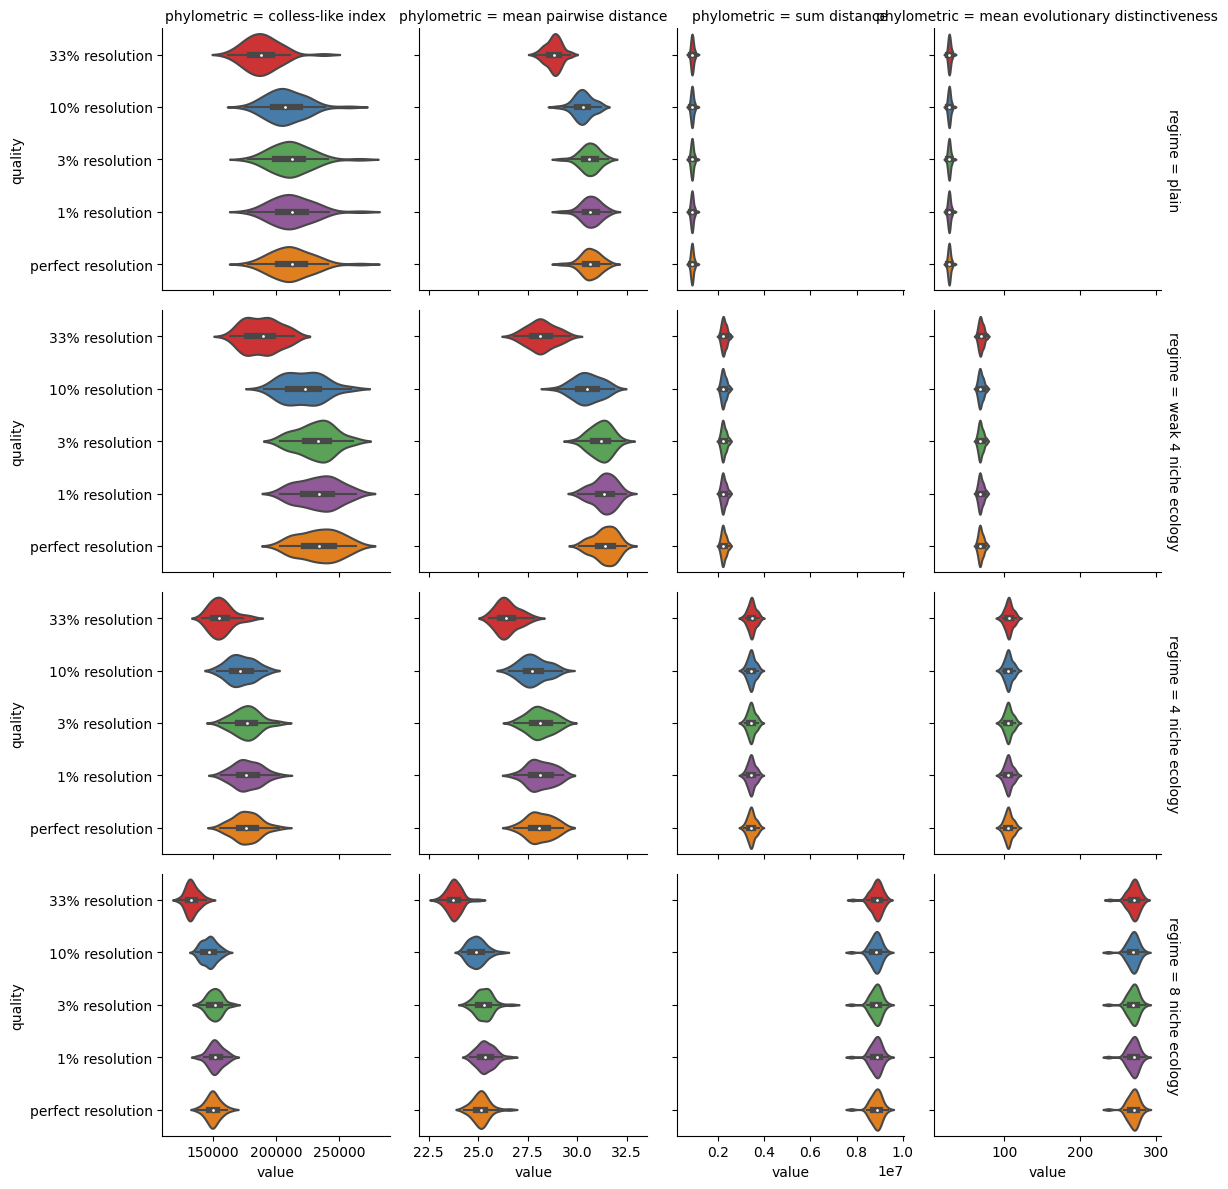

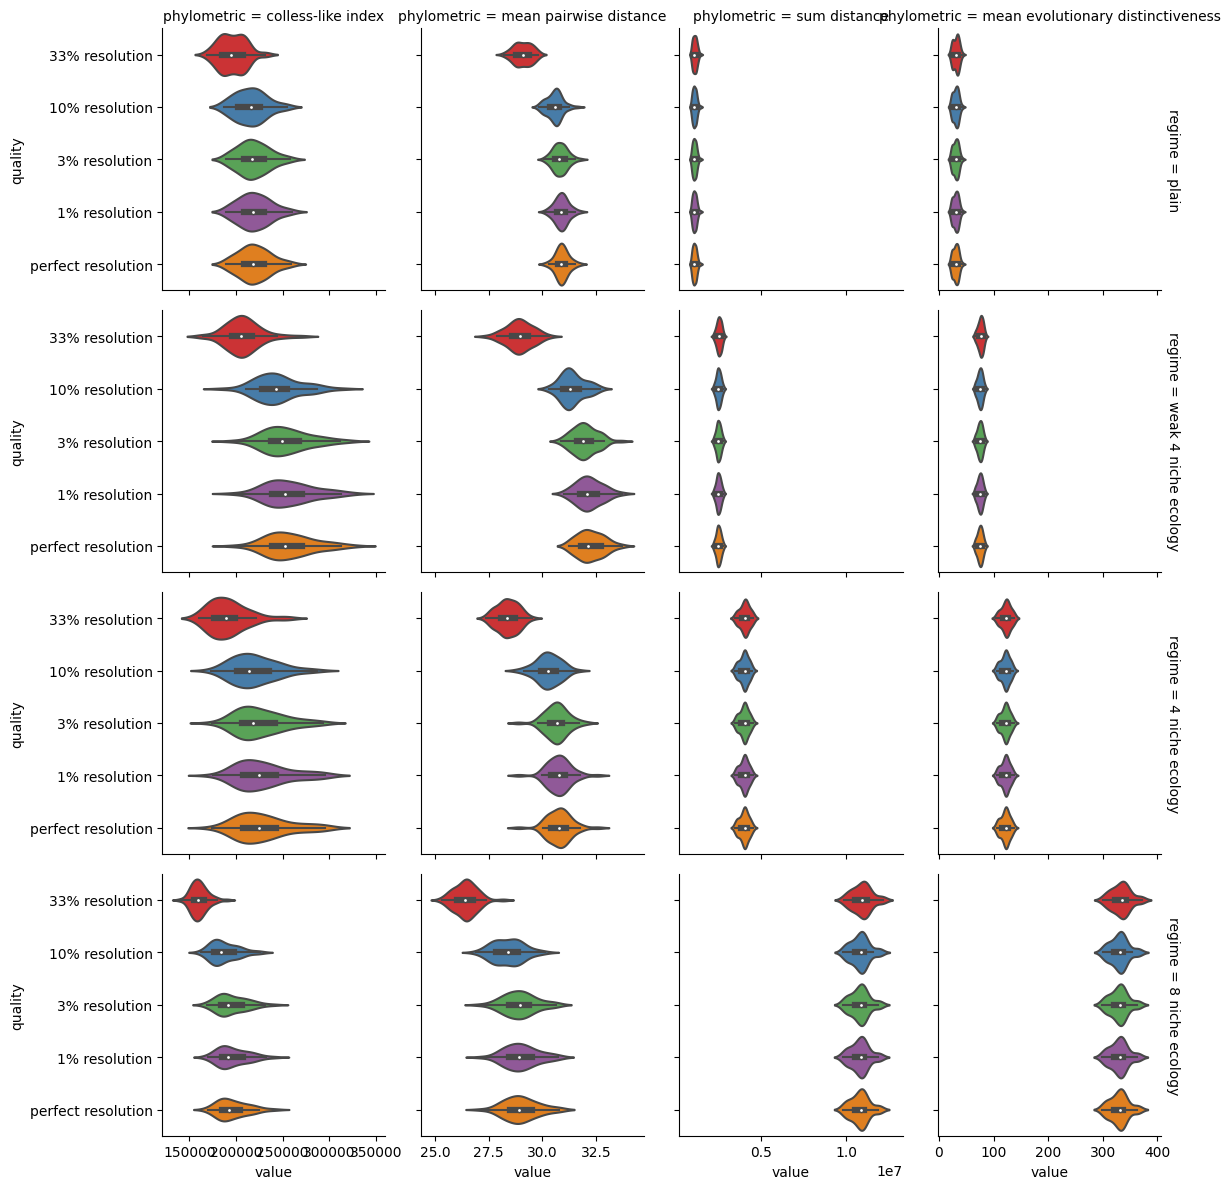

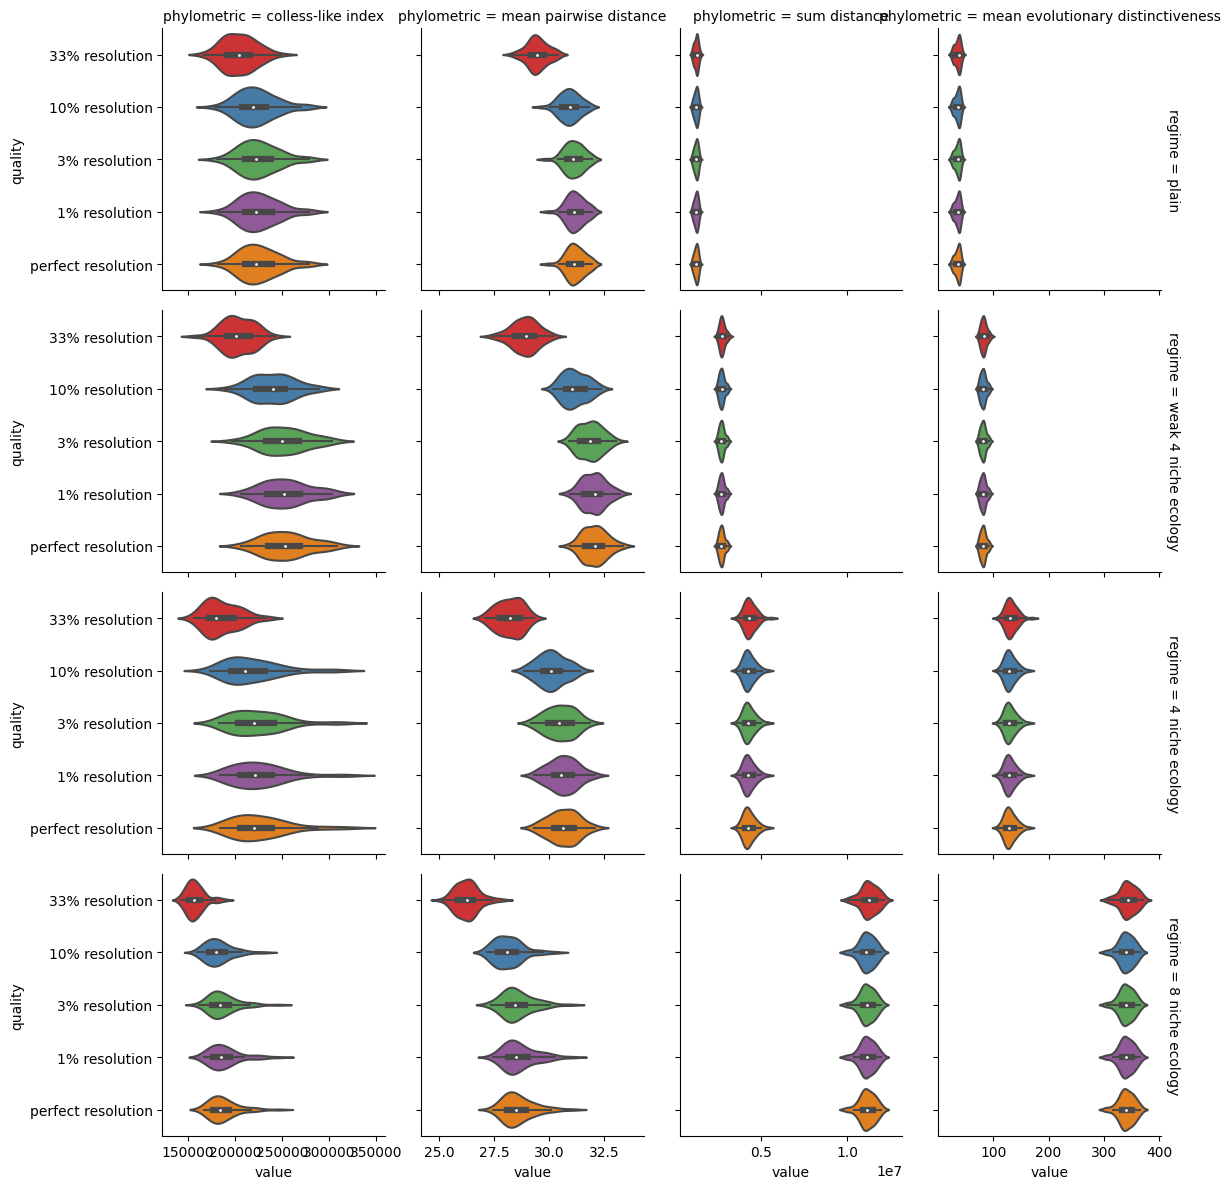

In [23]:
def make_do_plot(plotter):
    def do_plot(data, col, row, x, y):
        g = sns.FacetGrid(
            data,
            col=col,
            row=row,
            row_order=[
                "plain",
                "weak 4 niche ecology",
                "4 niche ecology",
                "8 niche ecology",
            ],
            sharex="col",
            margin_titles=True,
        ).set_titles(template="{col_name}")
        g.map(
            plotter,
            x,
            y,
            order=[
                "33% resolution",
                "10% resolution",
                "3% resolution",
                "1% resolution",
                "perfect resolution",
            ],
            palette=sns.color_palette("Set1", 5),
        )

    return do_plot


for viz, (group, group_df) in it.product(
    [
        sns.barplot,
        sns.boxplot,
        sns.violinplot,
    ],
    melted_df.groupby(sensitivity_analysis_variables),
):
    do_plot = make_do_plot(viz)
    do_plot.__name__ = viz.__name__
    tp.tee(
        do_plot,
        data=group_df,
        col="phylometric",
        row="regime",
        x="value",
        y="quality",
        teeplot_outattrs={
            **{
                "nuisance": "spatial-structure",
            },
            **dict(
                zip(sensitivity_analysis_variables, group),
            ),
        },
    )


# stats: comparison against perfect


In [24]:
records = []
for phylometric in phylometrics:
    for group, group_df in df.groupby(
        ["regime", *sensitivity_analysis_variables], as_index=False
    ):
        for quality in group_df["quality"].unique():
            if quality == "perfect resolution":
                continue
            kw_result, n = scipy_stats.wilcoxon(
                *zip(
                    *zip(
                        group_df[group_df["quality"] == "perfect resolution"][
                            phylometric
                        ],
                        group_df[group_df["quality"] == quality][phylometric],
                    )
                ),
            ), min(group_df.groupby(["quality"]).count()["a"])
            records.append(
                {
                    **{"quality": quality, "n": n, "phylometric": phylometric},
                    **dict(zip(["statistic", "p"], kw_result)),
                    **dict(
                        zip(["regime", *sensitivity_analysis_variables], group)
                    ),
                }
            )

with pd.option_context("display.max_colwidth", None, "display.max_rows", None):
    out_df = (
        pd.DataFrame.from_records(records)
        .sort_values(
            [*sensitivity_analysis_variables, "regime", "phylometric"],
        )
        .reset_index(drop=True)
    )
    display(out_df)
    os.makedirs("outdata", exist_ok=True)
    out_df.to_csv(
        "outdata/a=phylostatistics-comparison-between-resolutions-allpairs-wilcox-spatial-nuisance+ext=.csv",
        index=False,
    )


quality   n                        phylometric  statistic  \
0    33% resolution  50                 colless-like index        1.0   
1    10% resolution  50                 colless-like index      497.0   
2     1% resolution  50                 colless-like index      559.0   
3     3% resolution  50                 colless-like index      602.0   
4    33% resolution  50  mean evolutionary distinctiveness      514.0   
5    10% resolution  50  mean evolutionary distinctiveness      606.0   
6     1% resolution  50  mean evolutionary distinctiveness      631.0   
7     3% resolution  50  mean evolutionary distinctiveness      579.0   
8    33% resolution  50             mean pairwise distance        0.0   
9    10% resolution  50             mean pairwise distance      482.0   
10    1% resolution  50             mean pairwise distance      465.0   
11    3% resolution  50             mean pairwise distance      560.0   
12   33% resolution  50                       sum distance      514.0   
13   10% resolution  50                       sum distance      606.0   
14    1% resolution  50                       sum distance      631.0   
15    3% resolution  50                       sum distance      579.5   
16   10% resolution  50                 colless-like index      555.0   
17    1% resolution  50                 colless-like index      243.0   
18   33% resolution  50                 colless-like index        0.0   
19    3% resolution  50                 colless-like index      255.0   
20   10% resolution  50  mean evolutionary distinctiveness      511.0   
21    1% resolution  50  mean evolutionary distinctiveness      632.0   
22   33% resolution  50  mean evolutionary distinctiveness      486.0   
23    3% resolution  50  mean evolutionary distinctiveness      563.0   
24   10% resolution  50             mean pairwise distance      155.0   
25    1% resolution  50             mean pairwise distance       49.0   
26   33% resolution  50             mean pairwise distance        0.0   
27    3% resolution  50             mean pairwise distance       43.0   
28   10% resolution  50                       sum distance      511.0   
29    1% resolution  50                       sum distance      632.0   
30   33% resolution  50                       sum distance      486.0   
31    3% resolution  50                       sum distance      563.0   
32   33% resolution  50                 colless-like index        1.0   
33   10% resolution  50                 colless-like index      467.0   
34    3% resolution  50                 colless-like index      632.0   
35    1% resolution  50                 colless-like index      619.0   
36   33% resolution  50  mean evolutionary distinctiveness      556.0   
37   10% resolution  50  mean evolutionary distinctiveness      634.0   
38    3% resolution  50  mean evolutionary distinctiveness      607.0   
39    1% resolution  50  mean evolutionary distinctiveness      613.0   
40   33% resolution  50             mean pairwise distance        0.0   
41   10% resolution  50             mean pairwise distance      373.0   
42    3% resolution  50             mean pairwise distance      603.0   
43    1% resolution  50             mean pairwise distance      618.0   
44   33% resolution  50                       sum distance      556.0   
45   10% resolution  50                       sum distance      634.0   
46    3% resolution  50                       sum distance      607.0   
47    1% resolution  50                       sum distance      613.0   
48    3% resolution  50                 colless-like index      573.0   
49    1% resolution  50                 colless-like index      636.0   
50   10% resolution  50                 colless-like index      327.0   
51   33% resolution  50                 colless-like index        0.0   
52    3% resolution  50  mean evolutionary distinctiveness      612.0   
53    1% resolution  50  mean evolutionary distinctiveness      613.0 

# error signficance heatmap


teeplots/./epoch=0+hue=quality-threshold+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/./epoch=0+hue=quality-threshold+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.png


teeplots/./epoch=0+hue=quality-threshold+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/./epoch=0+hue=quality-threshold+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.png


teeplots/./epoch=2+hue=quality-threshold+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/./epoch=2+hue=quality-threshold+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.png


teeplots/./epoch=2+hue=quality-threshold+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/./epoch=2+hue=quality-threshold+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.png


teeplots/./epoch=7+hue=quality-threshold+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/./epoch=7+hue=quality-threshold+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.png


teeplots/./epoch=7+hue=quality-threshold+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.pdf


teeplots/./epoch=7+hue=quality-threshold+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=heatmap+x=regime+y=phylometric+ext=.png


regime                        phylometric  \
0        4 niche ecology                 colless-like index   
1        4 niche ecology  mean evolutionary distinctiveness   
2        4 niche ecology             mean pairwise distance   
3        4 niche ecology                       sum distance   
4        8 niche ecology                 colless-like index   
5        8 niche ecology  mean evolutionary distinctiveness   
6        8 niche ecology             mean pairwise distance   
7        8 niche ecology                       sum distance   
8                  plain                 colless-like index   
9                  plain  mean evolutionary distinctiveness   
10                 plain             mean pairwise distance   
11                 plain                       sum distance   
12  weak 4 niche ecology                 colless-like index   
13  weak 4 niche ecology  mean evolutionary distinctiveness   
14  weak 4 niche ecology             mean pairwise distance   
15  weak 4 niche ecology                       sum distance   

    quality threshold  epoch                  mut_distn  
0                  10      7  np.random.standard_normal  
1                  33      7  np.random.standard_normal  
2                   3      7  np.random.standard_normal  
3                  33      7  np.random.standard_normal  
4                  10      7  np.random.standard_normal  
5                  33      7  np.random.standard_normal  
6                   3      7  np.random.standard_normal  
7                  33      7  np.random.standard_normal  
8                  10      7  np.random.standard_normal  
9                  33      7  np.random.standard_normal  
10                  3      7  np.random.standard_normal  
11                 33      7  np.random.standard_normal  
12                  3      7  np.random.standard_normal  
13                 33      7  np.random.standard_normal  
14                  3      7  np.random.standard_normal  
15                 33      7  np.random.standard_normal

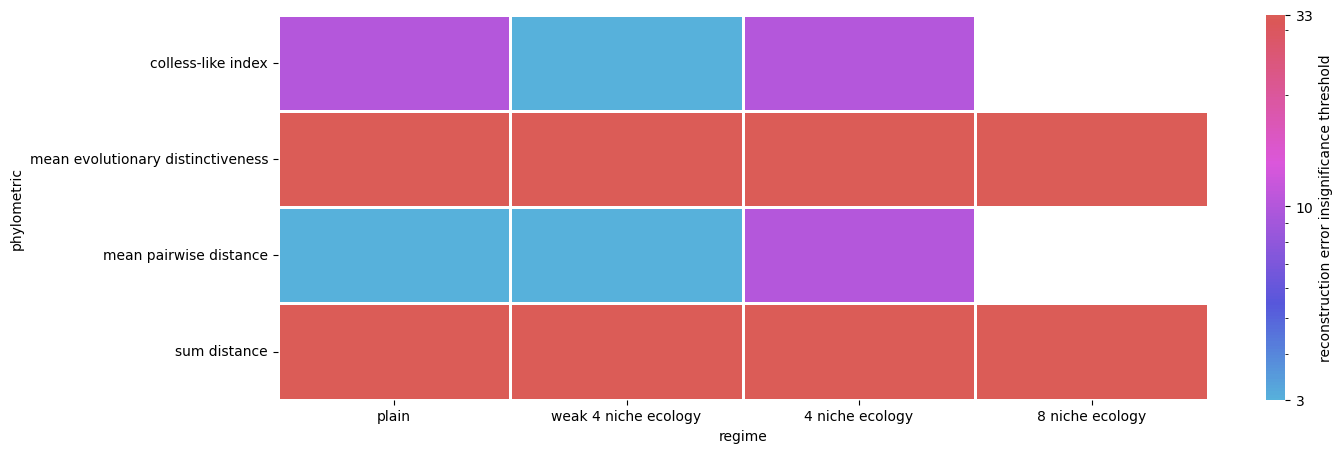

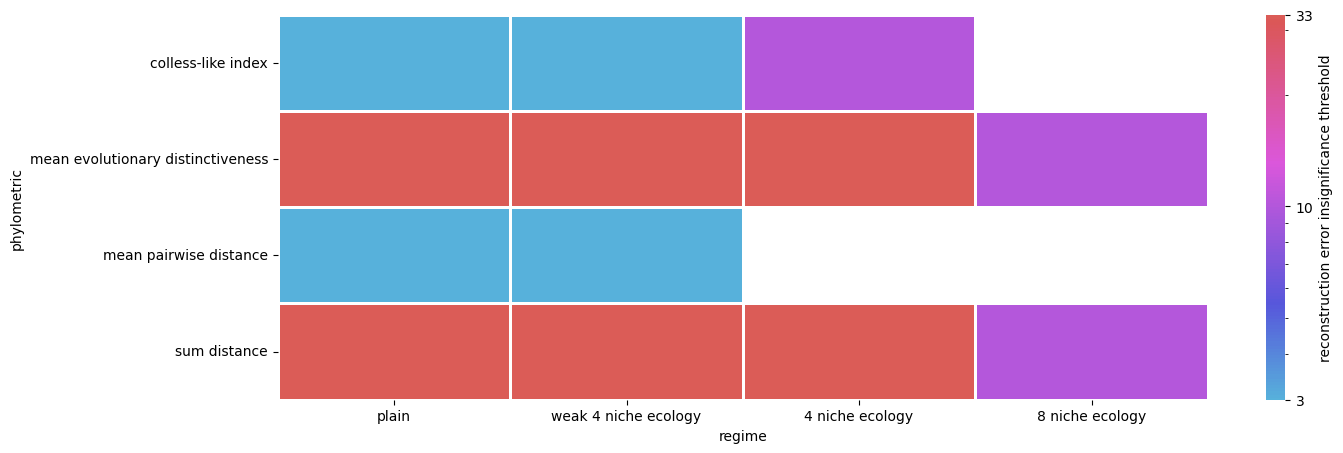

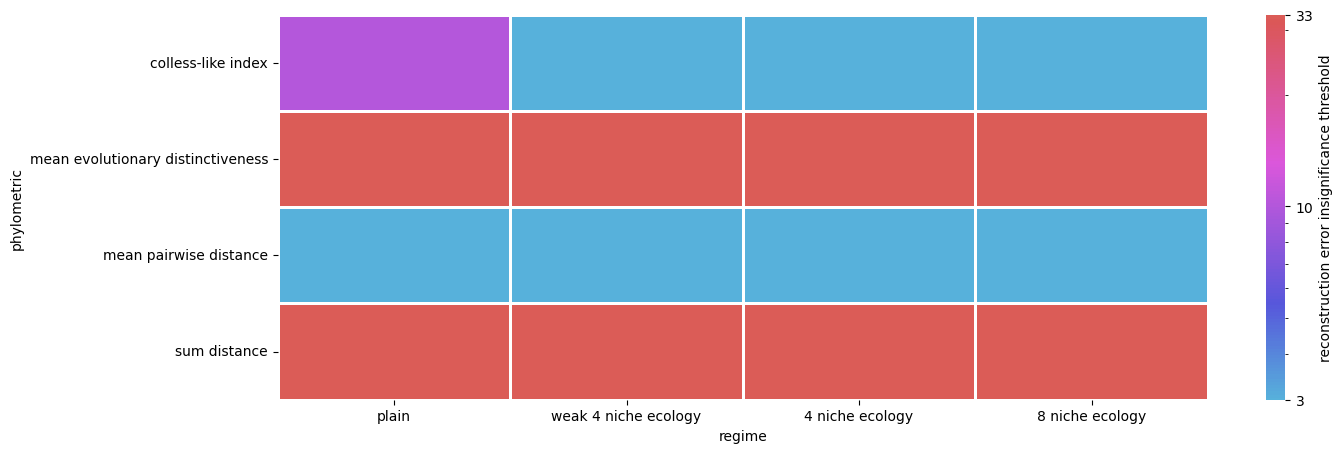

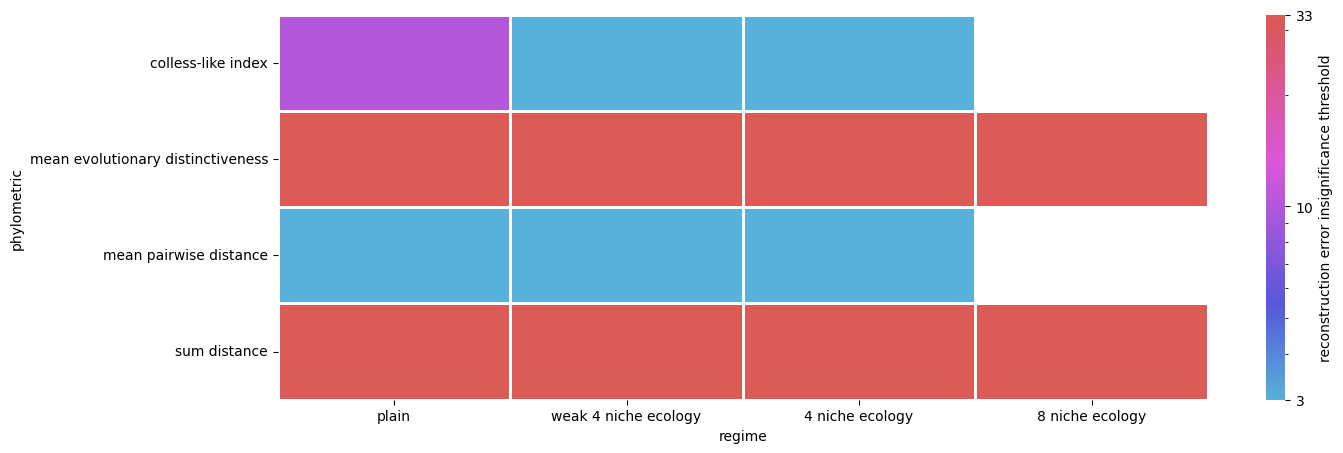

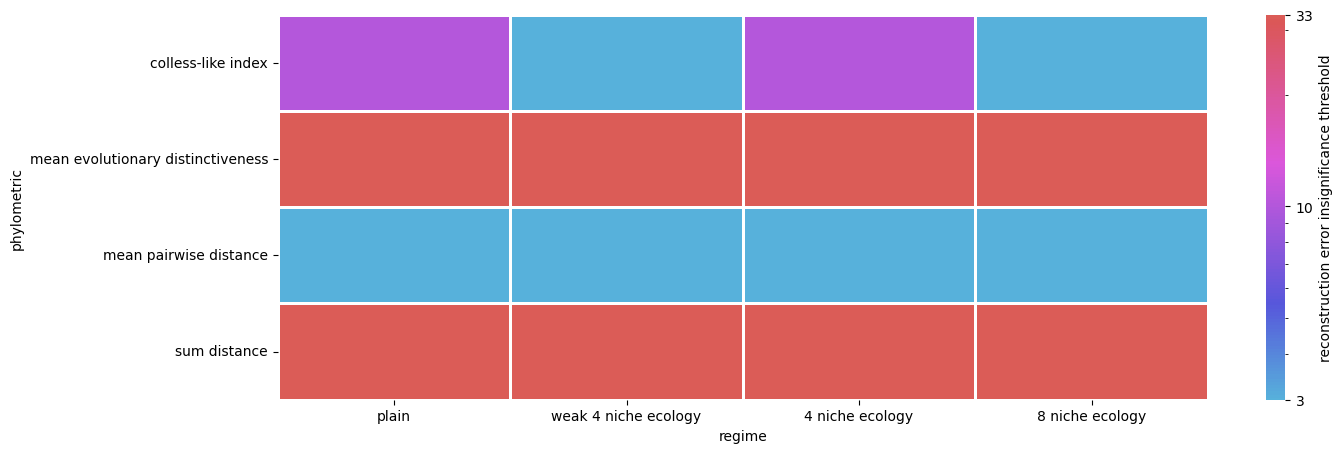

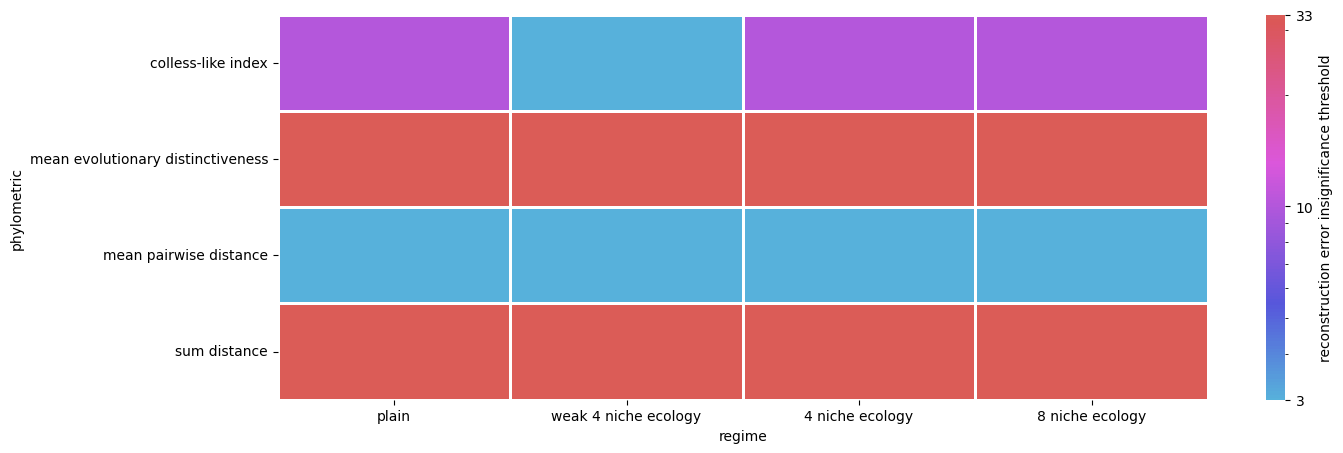

In [25]:
for group, group_df in out_df.groupby(
    sensitivity_analysis_variables, as_index=False
):
    group_df["quality threshold"] = group_df["quality"]
    group_df.loc[group_df["p"] > 0.05, "quality threshold"] = ""
    summarized_df = (
        group_df.groupby(["regime", "phylometric"])
        .agg(
            {
                "quality threshold": lambda subgroup: (
                    np.nan
                    if "1% resolution" in set(subgroup)
                    else 1
                    if "3% resolution" in set(subgroup)
                    else 3
                    if "10% resolution" in set(subgroup)
                    else 10
                    if "33% resolution" in set(subgroup)
                    else 33
                ),
                "epoch": lambda subgroup: ip.pophomogeneous(subgroup),
                "mut_distn": lambda subgroup: ip.pophomogeneous(subgroup),
            }
        )
        .reset_index()
    )

    matrix = summarized_df.pivot(
        index="phylometric",
        columns="regime",
        values="quality threshold",
    )
    matrix = matrix[
        sorted(
            matrix.columns,
            key=[
                "plain",
                "weak selection",
                "strong selection",
                "spatial structure",
                "weak 4 niche ecology",
                "4 niche ecology",
                "8 niche ecology",
            ].index,
        )
    ]

    fig, ax = plt.subplots(figsize=(15, 5))
    formatter = mpl.ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    tp.tee(
        sns.heatmap,
        matrix,
        linewidths=2,
        norm=mpl.colors.LogNorm(),
        cmap=sns.color_palette("hls", as_cmap=True),
        center=0,
        cbar_kws={
            "label": "reconstruction error insignificance threshold",
            "ticks": [1, 3, 10, 33],
            "format": formatter,
        },
        teeplot_outattrs={
            **dict(
                zip(sensitivity_analysis_variables, group),
            ),
            **{
                "nuisance": "spatial-structure",
                "hue": "quality-threshold",
                "x": "regime",
                "y": "phylometric",
            },
        },
    )

summarized_df
